## Heart attack risk prediction [One-hotEncoding, StandardScaler] version

### - Workflow:
 #### 1. Importing Libraries
 #### 2. Loading Dataset
 #### 3. Data Cleaning & processing
 #### 4. Exploratory Data Analysis
 #### 5. Outlier Detection & removal
 #### 6. Train Test Split
 #### 7. Cross Validation
 #### 8. Model Building
 #### 9. Model Evaluation
 #### 10. Feature Selection & Model evaluation
 #### 11. Conclusion
    

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, log_loss
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve,  average_precision_score

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
#from tqdm import tqdm

from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, RFE

from imblearn.over_sampling import SMOTE
import joblib, pickle, json

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dataset/heart_attack_prediction_dataset.csv')

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
import sklearn
print(sklearn.__version__)

1.4.2


## Data Cleaning & processing

In [5]:
# Replace spaces in column names with underscores

#data.columns = data.columns.str.replace(" ", "_")
data.columns = ["patient_id", "age", "sex", "cholesterol", "blood_pressure", "heart_rate", "diabetes", "family_history", "smoking", "obesity",
                "alcohol_consumption", "excersise_h_week", "diet", "previous_heart_problems", "medication_use", "stress_level","sedentary_h_day",
               "income", "bmi", "triglycerides", "active_d_week", "sleep_h_day", "country", "continent", "hemisphere", "heart_attack_risk"]

In [6]:
print("New column names:\n")
data.head()

New column names:



,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
print("Number of dublicated rows = ", data.duplicated().sum())

Number of dublicated rows =  0


In [8]:
print("Number or Null values:\n")
print(data.isna().sum())

Number or Null values:

patient_id                 0
age                        0
sex                        0
cholesterol                0
blood_pressure             0
heart_rate                 0
diabetes                   0
family_history             0
smoking                    0
obesity                    0
alcohol_consumption        0
excersise_h_week           0
diet                       0
previous_heart_problems    0
medication_use             0
stress_level               0
sedentary_h_day            0
income                     0
bmi                        0
triglycerides              0
active_d_week              0
sleep_h_day                0
country                    0
continent                  0
hemisphere                 0
heart_attack_risk          0
dtype: int64


In [9]:
# Filter to show only _categorical data_
print("Categorical data:\n")
categ_data = data.select_dtypes(include=['object'])
categ_data

Categorical data:



,patient_id,sex,blood_pressure,diet,country,continent,hemisphere
0,BMW7812,Male,158/88,Average,Argentina,South America,Southern Hemisphere
1,CZE1114,Male,165/93,Unhealthy,Canada,North America,Northern Hemisphere
2,BNI9906,Female,174/99,Healthy,France,Europe,Northern Hemisphere
3,JLN3497,Male,163/100,Average,Canada,North America,Northern Hemisphere
4,GFO8847,Male,91/88,Unhealthy,Thailand,Asia,Northern Hemisphere
...,...,...,...,...,...,...,...
8758,MSV9918,Male,94/76,Healthy,Thailand,Asia,Northern Hemisphere
8759,QSV6764,Female,157/102,Healthy,Canada,North America,Northern Hemisphere
8760,XKA5925,Male,161/75,Average,Brazil,South America,Southern Hemisphere
8761,EPE6801,Male,119/67,Unhealthy,Brazil,South America,Southern Hemisphere


In [10]:
data['blood_pressure'].head()

0     158/88
1     165/93
2     174/99
3    163/100
4      91/88
Name: blood_pressure, dtype: object

In [11]:
# separate the blood_pressure into two columns "systolic" and "diastolic" Blood pressure

data[['systolic_pressure', 'diastolic_pressure']] = data['blood_pressure'].str.split('/', expand=True)
# Convert the data type of the columns to int
data[['systolic_pressure', 'diastolic_pressure']] = data[['systolic_pressure', 'diastolic_pressure']].astype(int)
# Drop the original blood_pressure column
data.drop('blood_pressure', axis=1, inplace= True)

print("Modifying blood_pressure column:\n")
data.head()

Modifying blood_pressure column:



,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [12]:
print("How many Males & Females in our data:")
data['sex'].value_counts()

How many Males & Females in our data:


sex
Male      6111
Female    2652
Name: count, dtype: int64

In [13]:
print("How many people are in each Diet level:")
data['diet'].value_counts()

How many people are in each Diet level:


diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [14]:
print("How many smokers in our data:")
data['smoking'].value_counts()

How many smokers in our data:


smoking
1    7859
0     904
Name: count, dtype: int64

In [15]:
print("How many people in each country:")
data['country'].value_counts()

How many people in each country:


country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [16]:
data['stress_level'].value_counts().sort_values()

stress_level
10    823
6     855
5     860
1     865
3     868
8     879
9     887
7     903
4     910
2     913
Name: count, dtype: int64

In [17]:
data['active_d_week'].value_counts().sort_index()

active_d_week
0    1065
1    1121
2    1109
3    1143
4    1077
5    1079
6    1074
7    1095
Name: count, dtype: int64

In [18]:
data['sleep_h_day'].value_counts().sort_index()

sleep_h_day
4     1181
5     1263
6     1276
7     1270
8     1288
9     1192
10    1293
Name: count, dtype: int64

In [19]:
print("Number of people at risk to heart attack and not in risk ?!:")
data['heart_attack_risk'].value_counts()

Number of people at risk to heart attack and not in risk ?!:


heart_attack_risk
0    5624
1    3139
Name: count, dtype: int64

In [20]:
print("How many Rows and Columns: ", data.shape)

How many Rows and Columns:  (8763, 27)


## Exploratory Data Analysis

In [21]:
# summary statistics for numerical columns
print("_summary statistics_ numerical columns:\n")
data.describe(include=[np.number])

_summary statistics_ numerical columns:



,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,heart_attack_risk,systolic_pressure,diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


In [22]:
# Summary statistics for selected numerical columns
print("Summary Statistics for Selected Numerical Columns:\n")
selected_columns = ['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history']  # Replace with the names of the columns you want to include
data[selected_columns].describe()


Summary Statistics for Selected Numerical Columns:



,age,cholesterol,heart_rate,diabetes,family_history
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982
std,21.249509,80.863276,20.550948,0.476271,0.499979
min,18.000000,120.000000,40.000000,0.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000


In [23]:
# Summary statistics for selected numerical columns
print("Summary Statistics for Selected Numerical Columns:\n")
selected_columns = ['smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week', 'previous_heart_problems']  # Replace with the names of the columns you want to include
data[selected_columns].describe()


Summary Statistics for Selected Numerical Columns:



,smoking,obesity,alcohol_consumption,excersise_h_week,previous_heart_problems
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.896839,0.501426,0.598083,10.014284,0.495835
std,0.304186,0.500026,0.490313,5.783745,0.500011
min,0.000000,0.000000,0.000000,0.002442,0.000000
25%,1.000000,0.000000,0.000000,4.981579,0.000000
50%,1.000000,1.000000,1.000000,10.069559,0.000000
75%,1.000000,1.000000,1.000000,15.050018,1.000000
max,1.000000,1.000000,1.000000,19.998709,1.000000


In [24]:
# Summary statistics for selected numerical columns
print("Summary Statistics for Selected Numerical Columns:\n")
selected_columns = ['stress_level', 'sedentary_h_day', 'income', 'bmi', 'triglycerides']  # Replace with the names of the columns you want to include
data[selected_columns].describe()


Summary Statistics for Selected Numerical Columns:



,stress_level,sedentary_h_day,income,bmi,triglycerides
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,5.469702,5.993690,158263.181901,28.891446,417.677051
std,2.859622,3.466359,80575.190806,6.319181,223.748137
min,1.000000,0.001263,20062.000000,18.002337,30.000000
25%,3.000000,2.998794,88310.000000,23.422985,225.500000
50%,5.000000,5.933622,157866.000000,28.768999,417.000000
75%,8.000000,9.019124,227749.000000,34.324594,612.000000
max,10.000000,11.999313,299954.000000,39.997211,800.000000


In [25]:
# Summary statistics for selected numerical columns
print("Summary Statistics for Selected Numerical Columns:\n")
selected_columns = ['active_d_week', 'sleep_h_day', 'heart_attack_risk', 'systolic_pressure', 'diastolic_pressure']  # Replace with the names of the columns you want to include
data[selected_columns].describe()


Summary Statistics for Selected Numerical Columns:



,active_d_week,sleep_h_day,heart_attack_risk,systolic_pressure,diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,3.489672,7.023508,0.358211,135.075659,85.156111
std,2.282687,1.988473,0.479502,26.349976,14.676565
min,0.000000,4.000000,0.000000,90.000000,60.000000
25%,2.000000,5.000000,0.000000,112.000000,72.000000
50%,3.000000,7.000000,0.000000,135.000000,85.000000
75%,5.000000,9.000000,1.000000,158.000000,98.000000
max,7.000000,10.000000,1.000000,180.000000,110.000000


In [26]:
# summary statistics for categorical columns
print("summary statistics Categorical data after modifying blood_pressrue:\n")
data.describe(include=['object'])

summary statistics Categorical data after modifying blood_pressrue:



,patient_id,sex,diet,country,continent,hemisphere
count,8763,8763,8763,8763,8763,8763
unique,8763,2,3,20,6,2
top,BMW7812,Male,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,2960,477,2543,5660


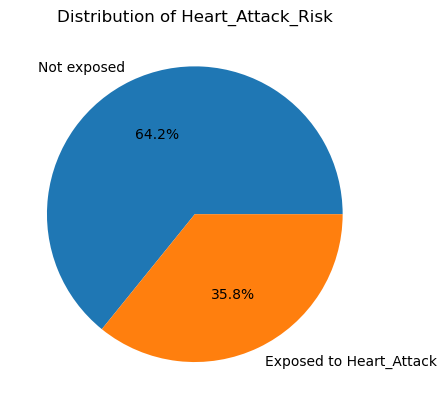

In [27]:
# Distribution of heart_attack_risk (target variable)

target_counts = data['heart_attack_risk'].value_counts().sort_values(ascending=False)

# Extract category labels and counts for the pie chart
pie_labels = target_counts.index.to_numpy()  # Convert index to NumPy array for plotting
pie_values = target_counts.to_numpy()
labels = ['Not exposed','Exposed to Heart_Attack'] # based on value_counts

plt.pie(pie_values, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Heart_Attack_Risk")
plt.savefig('img/Distribution of Heart_Attack_Risk.png')
plt.show()

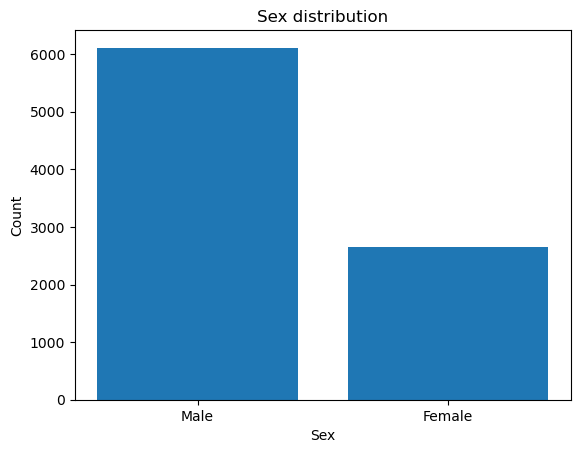

In [28]:
# gender and age distribution
gender_counts = data['sex'].value_counts()
#custom_colors = ['lightblue', 'lightseagreen']  # Adjust colors as needed
#plt.gca().set_prop_cycle('color', custom_colors)  # Set custom color cycle

# Create a bar chart
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex distribution")
plt.savefig('Sex distribution.png')
plt.show()

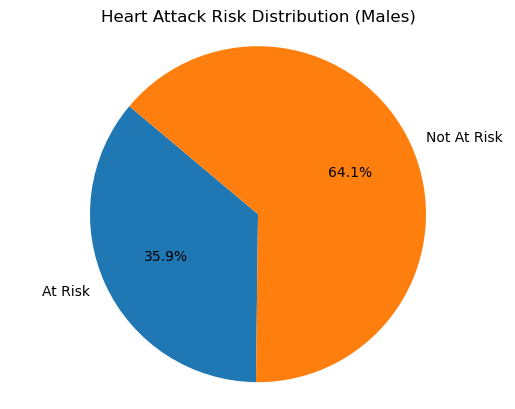

In [29]:
# Filter data for male patients only
male_data = data[data['sex'] == 'Male']

# Separate data for patients at risk and not at risk
at_risk = male_data[male_data['heart_attack_risk'] == 1]
not_at_risk = male_data[male_data['heart_attack_risk'] == 0]

# Calculate percentages
total_males = len(male_data)
percent_at_risk = (len(at_risk) / total_males) * 100
percent_not_at_risk = (len(not_at_risk) / total_males) * 100

# Create labels for pie chart slices
labels = ['At Risk', 'Not At Risk']


# Define pie chart slice sizes
sizes = [percent_at_risk, percent_not_at_risk]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Attack Risk Distribution (Males)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.savefig('img/male distribution of heart attack risk.png')
plt.show()

###############################################################################################

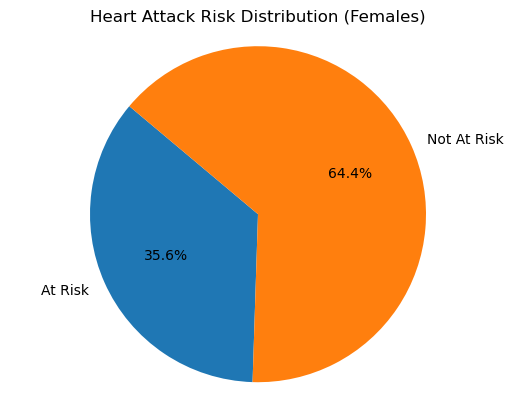

In [30]:
# Filter data for male patients only
female_data = data[data['sex'] == 'Female']

# Separate data for patients at risk and not at risk
at_risk = female_data[female_data['heart_attack_risk'] == 1]
not_at_risk = female_data[female_data['heart_attack_risk'] == 0]

# Calculate percentages
total_females = len(male_data)
percent_at_risk = (len(at_risk) / total_females) * 100
percent_not_at_risk = (len(not_at_risk) / total_females) * 100

# Create labels for pie chart slices
labels = ['At Risk', 'Not At Risk']


# Define pie chart slice sizes
sizes = [percent_at_risk, percent_not_at_risk]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Attack Risk Distribution (Females)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.savefig('img/female distribution of heart attack risk.png')
plt.show()

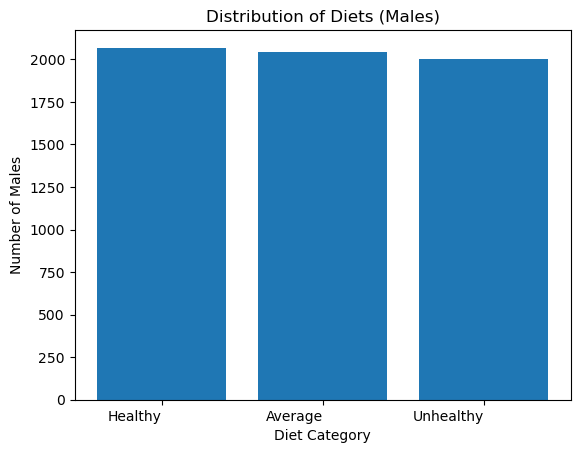

In [31]:
male_data = data[data['sex'] == 'Male']

# Count occurrences of each diet category for males only
male_diet_counts = male_data['diet'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.bar(male_diet_counts.index, male_diet_counts.values)
plt.xlabel('Diet Category')
plt.ylabel('Number of Males')
plt.title('Distribution of Diets (Males)')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability with many categories
plt.savefig('img/Diet distribution for male.png')
plt.show()


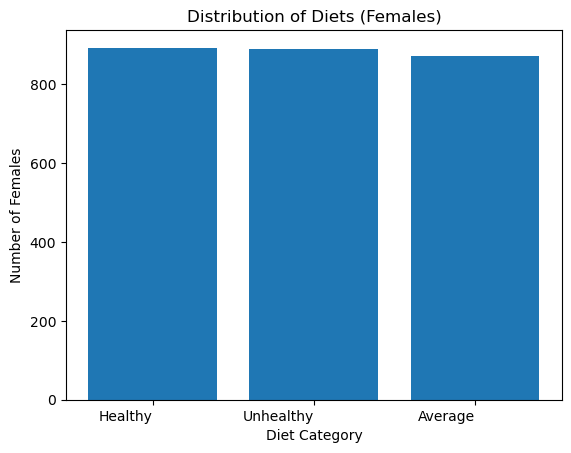

In [32]:
female_data = data[data['sex'] == 'Female']

# Count occurrences of each diet category for males only
female_diet_counts = female_data['diet'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.bar(female_diet_counts.index, female_diet_counts.values)
plt.xlabel('Diet Category')
plt.ylabel('Number of Females')
plt.title('Distribution of Diets (Females)')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability with many categories
plt.savefig('img/Diet distribution for female.png')
plt.show()


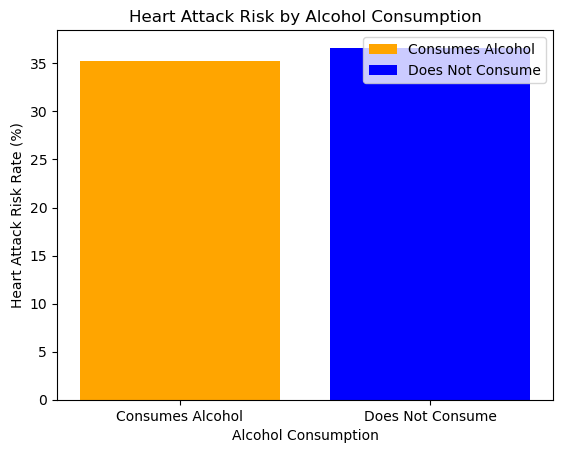

In [33]:
# Assuming data is loaded in 'data' dataframe
consumers = data[data['alcohol_consumption'] == 1]
non_consumers = data[data['alcohol_consumption'] == 0]

# Calculate risk rate (percentage) for consumers
consumer_risk_rate = (sum(consumers['heart_attack_risk']) / len(consumers)) * 100

# Calculate risk rate for non-consumers
non_consumer_risk_rate = (sum(non_consumers['heart_attack_risk']) / len(non_consumers)) * 100

# Create a bar chart
consumer_bar = plt.bar(['Consumes Alcohol'], [consumer_risk_rate], color='orange', label='Consumes Alcohol')
non_consumer_bar = plt.bar(['Does Not Consume'], [non_consumer_risk_rate], color='blue', label='Does Not Consume')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Heart Attack Risk Rate (%)')
plt.title('Heart Attack Risk by Alcohol Consumption')
plt.legend()
plt.savefig('img/Heart Attack Risk by Alcohol Consumption.png')
plt.show()


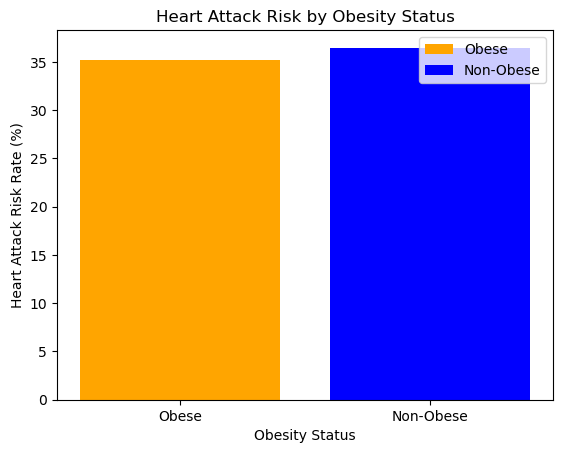

In [34]:
# Assuming data is loaded in 'data' dataframe
obese_individuals = data[data['obesity'] == 1]  # Selecting rows where obesity is 1 (obese individuals)
non_obese_individuals = data[data['obesity'] == 0]  # Selecting rows where obesity is 0 (non-obese individuals)

# Calculate risk rate (percentage) for obese individuals
obese_risk_rate = (sum(obese_individuals['heart_attack_risk']) / len(obese_individuals)) * 100

# Calculate risk rate for non-obese individuals
non_obese_risk_rate = (sum(non_obese_individuals['heart_attack_risk']) / len(non_obese_individuals)) * 100

# Create a bar chart
obese_bar = plt.bar(['Obese'], [obese_risk_rate], color='orange', label='Obese')
non_obese_bar = plt.bar(['Non-Obese'], [non_obese_risk_rate], color='blue', label='Non-Obese')

# Adding labels and title to the plot
plt.xlabel('Obesity Status')
plt.ylabel('Heart Attack Risk Rate (%)')
plt.title('Heart Attack Risk by Obesity Status')

# Adding legend
plt.legend()

# Saving the plot as an image
plt.savefig('img/Heart Attack Risk by Obesity.png')

# Displaying the plot
plt.show()


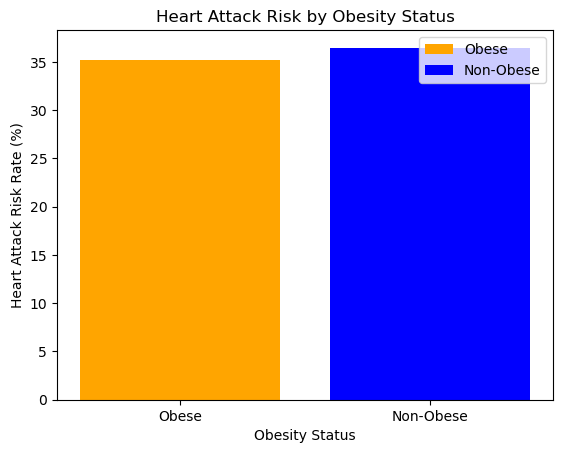

In [35]:
# Assuming data is loaded in 'data' dataframe
obese_individuals = data[data['obesity'] == 1]  # Selecting rows where obesity is 1 (obese individuals)
non_obese_individuals = data[data['obesity'] == 0]  # Selecting rows where obesity is 0 (non-obese individuals)

# Calculate risk rate (percentage) for obese individuals
obese_risk_rate = (sum(obese_individuals['heart_attack_risk']) / len(obese_individuals)) * 100

# Calculate risk rate for non-obese individuals
non_obese_risk_rate = (sum(non_obese_individuals['heart_attack_risk']) / len(non_obese_individuals)) * 100

# Create a bar chart
obese_bar = plt.bar(['Obese'], [obese_risk_rate], color='orange', label='Obese')
non_obese_bar = plt.bar(['Non-Obese'], [non_obese_risk_rate], color='blue', label='Non-Obese')

# Adding labels and title to the plot
plt.xlabel('Obesity Status')
plt.ylabel('Heart Attack Risk Rate (%)')
plt.title('Heart Attack Risk by Obesity Status')

# Adding legend
plt.legend()

# Saving the plot as an image
plt.savefig('img/Heart Attack Risk by Obesity.png')

# Displaying the plot
plt.show()


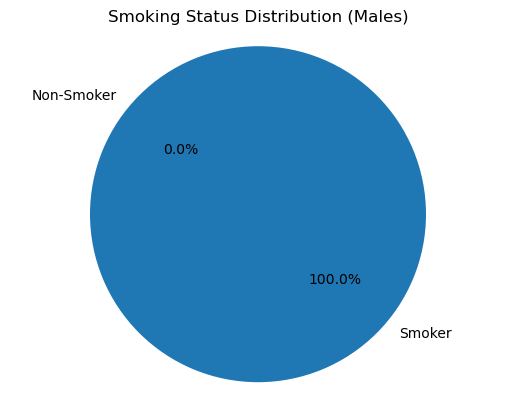

In [36]:

# Count smokers and non-smokers for males
male_smokers = len(male_data[male_data['smoking'] == 1])
male_non_smokers = len(male_data[male_data['smoking'] == 0])

# Calculate percentages
male_smoker_pct = (male_smokers / len(male_data)) * 100
male_non_smoker_pct = (male_non_smokers / len(male_data)) * 100

# Define pie chart slices and labels for males
male_pie_slices = [male_smoker_pct, male_non_smoker_pct]
male_pie_labels = ['Smoker', 'Non-Smoker']

# Create the pie chart for males
plt.pie(male_pie_slices, labels=male_pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Smoking Status Distribution (Males)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.savefig('img/smoking status for males.png')
plt.show()


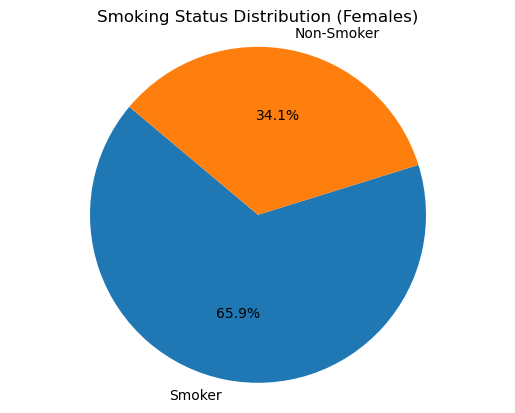

In [37]:
# Count smokers and non-smokers for females
female_smokers = len(female_data[female_data['smoking'] == 1])
female_non_smokers = len(female_data[female_data['smoking'] == 0])

# Calculate percentages
female_smoker_pct = (female_smokers / len(female_data)) * 100
female_non_smoker_pct = (female_non_smokers / len(female_data)) * 100

# Define pie chart slices and labels for females
female_pie_slices = [female_smoker_pct, female_non_smoker_pct]
female_pie_labels = ['Smoker', 'Non-Smoker']

# Create the pie chart for females
plt.pie(female_pie_slices, labels=female_pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Smoking Status Distribution (Females)')
plt.axis('equal')
plt.savefig('img/smoking status for females.png')
plt.show()


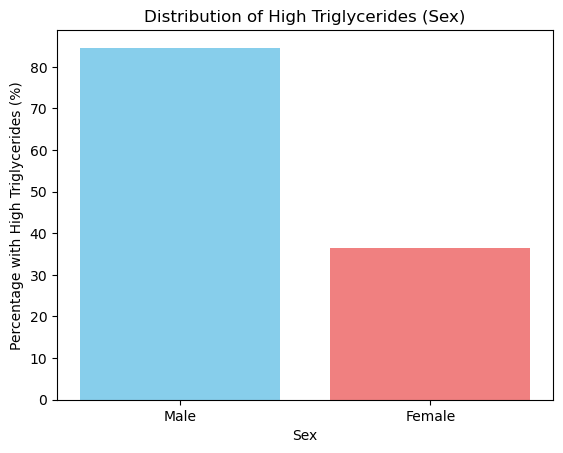

In [38]:
# visualize the distribution of high triglycerides and your threshold is 150 mg/dL
high_triglycerides = data[data['triglycerides'] > 150]  # Adjust the threshold as needed

male_high_triglycerides = high_triglycerides[high_triglycerides['sex'] == 'Male']
female_high_triglycerides = high_triglycerides[high_triglycerides['sex'] == 'Female']

percent_males_high_triglycerides = (len(male_high_triglycerides) / total_males) * 100
percent_females_high_triglycerides = (len(female_high_triglycerides) / total_females) * 100

# Define data for bar chart
percentages = [percent_males_high_triglycerides, percent_females_high_triglycerides]
sex_list = ['Male', 'Female']

# Create a bar chart
plt.bar(sex_list, percentages, color=['skyblue', 'lightcoral'])
plt.xlabel('Sex')
plt.ylabel('Percentage with High Triglycerides (%)')
plt.title('Distribution of High Triglycerides (Sex)')
plt.savefig('img/Distribution of High Triglycerides accoding to Sex with 150_threshold.png')
plt.show()


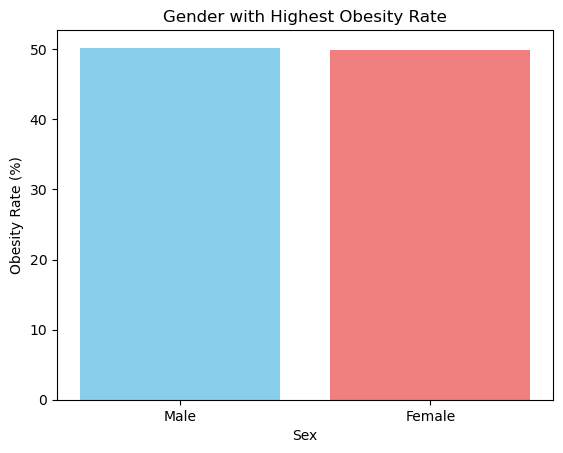

In [39]:

obese_males = len(data[(data['sex'] == 'Male') & (data['obesity'] == 1)])
total_males = len(data[data['sex'] == 'Male'])

obese_females = len(data[(data['sex'] == 'Female') & (data['obesity'] == 1)])
total_females = len(data[data['sex'] == 'Female'])

# Calculate percentages
male_obesity_pct = (obese_males / total_males) * 100
female_obesity_pct = (obese_females / total_females) * 100

# Define data for bar chart
percentages = [male_obesity_pct, female_obesity_pct]
sexes = ['Male', 'Female']

# Create a bar chart
plt.bar(sexes, percentages, color=['skyblue', 'lightcoral'])
plt.xlabel('Sex')
plt.ylabel('Obesity Rate (%)')
plt.title('Gender with Highest Obesity Rate')
plt.show()


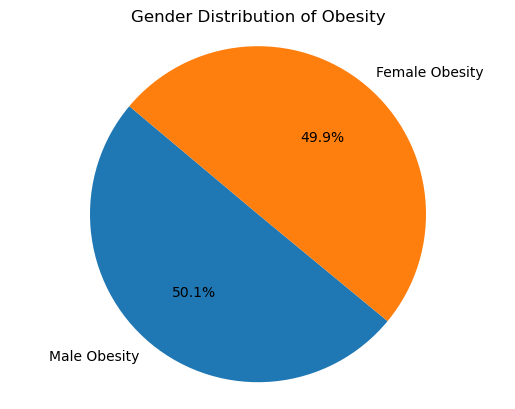

In [40]:
# Same calculations for percentages as in option 1

# Define pie chart slices and labels
pie_slices = [male_obesity_pct, female_obesity_pct]
pie_labels = ['Male Obesity', 'Female Obesity']

# Create the pie chart
plt.pie(pie_slices, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Obesity')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


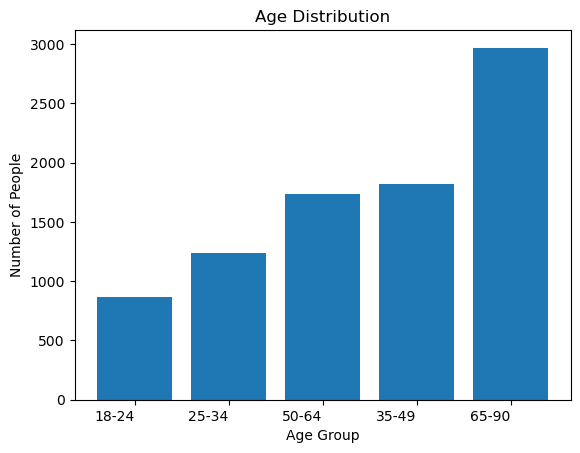

In [41]:
# visualize the age distribution in groups
def get_age_group(age):
    if 18 <= age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 49:
        return "35-49"
    elif 50 <= age <= 64:
        return "50-64"
    else:
        return "65-90"


# apply the age groups
data['age_group'] = data['age'].apply(get_age_group)

# manually replace bin labels 
data['age_group'] = pd.cut(data['age'], bins=[18, 25, 35, 50, 65, 91], labels=["18-24", "25-34", "35-49", "50-64", "65-90"])

# bar chart
# Count occurrences in each age group
age_group_counts = data['age_group'].value_counts()

# Sort age group counts in ascending order
age_group_counts_sorted = age_group_counts.sort_values(ascending=True)

# Create a bar chart
plt.bar(age_group_counts_sorted.index, age_group_counts_sorted.values)
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Age Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.savefig('img/visualize the age distribution in groups.png')
plt.show()


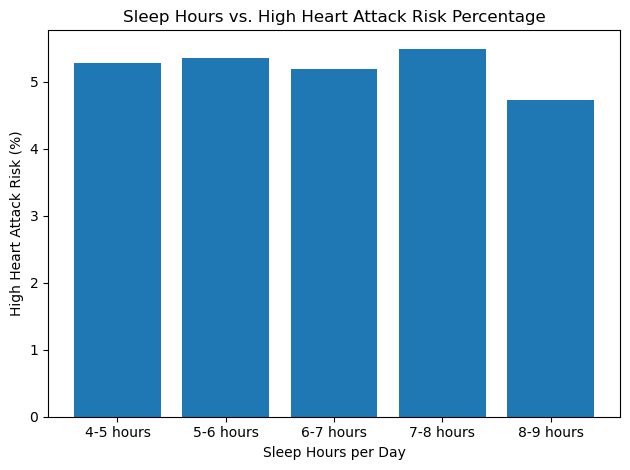

In [42]:
# relationship between sleep hours and heart attack risk

# Bin sleep hours into categories (adjust bin edges as needed)
bins = [4, 5, 6, 7, 8, 9, 10]
labels = ['4-5 hours', '5-6 hours', '6-7 hours', '7-8 hours', '8-9 hours', '9-10 hours',]

# Calculate percentage of high risk patients within each sleep hour bin
n_patients_per_bin, bins = pd.cut(data['sleep_h_day'], bins=bins, labels=labels, retbins=True)
n_high_risk_per_bin = data[data['heart_attack_risk'] == 1].groupby(n_patients_per_bin)['heart_attack_risk'].count()
percentages = n_high_risk_per_bin / len(data) * 100  # Convert counts to percentages

# Calculate standard error (assuming binomial distribution) for confidence interval (adjust as needed)
se = np.sqrt(percentages * (1 - percentages) / len(data))

plt.bar(labels[:-1], percentages[:-1], yerr=se[:-1], capsize=7)  # Exclude the last bin for error bars
plt.xlabel('Sleep Hours per Day')
plt.ylabel('High Heart Attack Risk (%)')
plt.title('Sleep Hours vs. High Heart Attack Risk Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('img/Sleep Hours vs. High Heart Attack Risk Percentage.png')
plt.show()


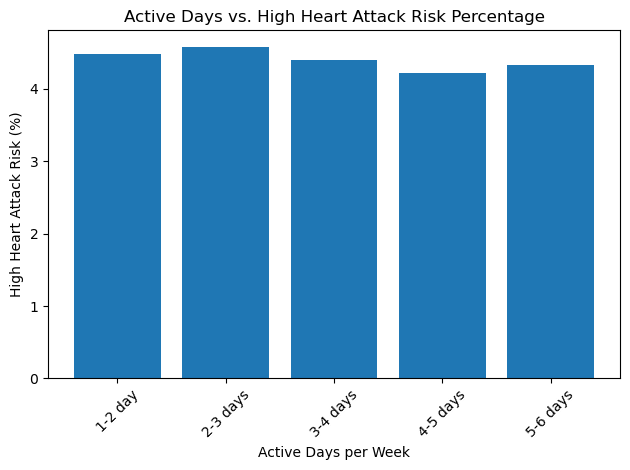

In [43]:
# # relationship between sleep hours and heart attack risk

# Bin active days per week into categories (adjust bin edges as needed)
bins = [ 1, 2, 3, 4, 5, 6, 7]
labels = ['1-2 day', '2-3 days', '3-4 days', '4-5 days', '5-6 days', '6-7 days']

# Calculate percentage of high risk patients within each active days bin
n_patients_per_bin, bins = pd.cut(data['active_d_week'], bins=bins, labels=labels, retbins=True)
n_high_risk_per_bin = data[data['heart_attack_risk'] == 1].groupby(n_patients_per_bin)['heart_attack_risk'].count()
percentages = n_high_risk_per_bin / len(data) * 100  # Convert counts to percentages

# Calculate standard error (assuming binomial distribution) for confidence interval (adjust as needed)
se = np.sqrt(percentages * (1 - percentages) / len(data))

plt.bar(labels[:-1], percentages[:-1], yerr=se[:-1], capsize=7)  # Exclude the last bin for error bars
plt.xlabel('Active Days per Week')
plt.ylabel('High Heart Attack Risk (%)')
plt.title('Active Days vs. High Heart Attack Risk Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('img/Active Days vs. High Heart Attack Risk Percentage.png')
plt.show()


In [44]:
# OneHotEncoder
one_h_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Using drop='first' to avoid dummy variable trap

In [45]:
# Fit and transform the 'sex' column
sex_encoded_data = pd.DataFrame(one_h_encoder.fit_transform(data[['sex']]), columns=one_h_encoder.get_feature_names_out(['sex']))

# Concatenate the encoded columns back to the original DataFrame
data = pd.concat([data, sex_encoded_data], axis=1)

data

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure,age_group,sex_Male
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,65-90,1.0
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,18-24,1.0
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,18-24,0.0
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100,65-90,1.0
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,65-90,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76,50-64,1.0
8759,QSV6764,28,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102,25-34,0.0
8760,XKA5925,47,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75,35-49,1.0
8761,EPE6801,36,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67,35-49,1.0


In [46]:
# Fit and transform the 'diet' column
diet_encoded_data = pd.DataFrame(one_h_encoder.fit_transform(data[['diet']]), columns=one_h_encoder.get_feature_names_out(['diet']))

# Concatenate the encoded columns back to the original DataFrame
data = pd.concat([data, diet_encoded_data], axis=1)

data

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure,age_group,sex_Male,diet_Healthy,diet_Unhealthy
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,65-90,1.0,0.0,0.0
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,18-24,1.0,0.0,1.0
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,18-24,0.0,1.0,0.0
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100,65-90,1.0,0.0,0.0
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,65-90,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76,50-64,1.0,1.0,0.0
8759,QSV6764,28,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102,25-34,0.0,1.0,0.0
8760,XKA5925,47,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75,35-49,1.0,0.0,0.0
8761,EPE6801,36,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67,35-49,1.0,0.0,1.0


In [47]:
# Lowercase all column names in the entire DataFrame
data.columns = [col.lower() for col in data.columns]

#data.drop(['patient_id', 'country', 'continent', 'hemisphere'], axis=1, inplace=True)

In [48]:
data

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure,age_group,sex_male,diet_healthy,diet_unhealthy
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,65-90,1.0,0.0,0.0
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,18-24,1.0,0.0,1.0
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,18-24,0.0,1.0,0.0
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100,65-90,1.0,0.0,0.0
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,65-90,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76,50-64,1.0,1.0,0.0
8759,QSV6764,28,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102,25-34,0.0,1.0,0.0
8760,XKA5925,47,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75,35-49,1.0,0.0,0.0
8761,EPE6801,36,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67,35-49,1.0,0.0,1.0


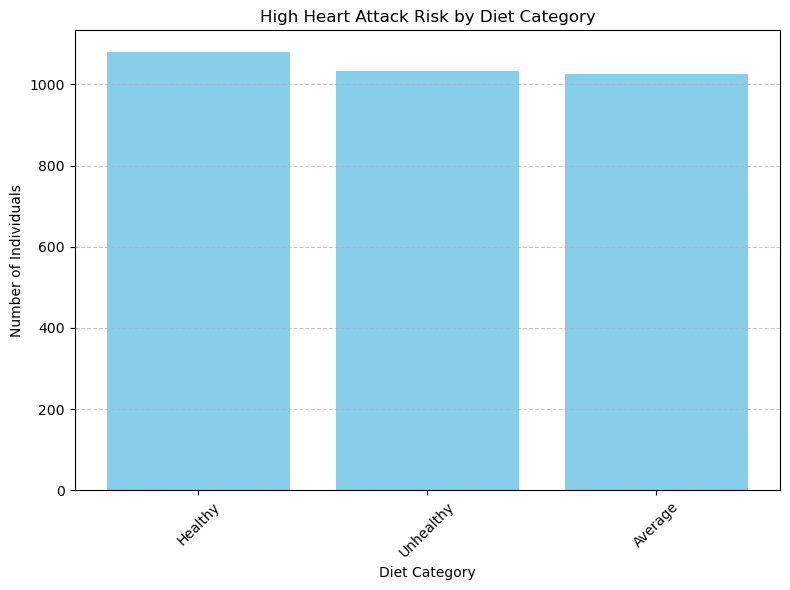

In [49]:
# Filter the data for individuals with high heart attack risk
high_risk_df = data[data['heart_attack_risk'] == 1]

# Count the number of individuals in each diet category with high risk
diet_counts = high_risk_df['diet'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(diet_counts.index, diet_counts.values, color='skyblue')
plt.title('High Heart Attack Risk by Diet Category')
plt.xlabel('Diet Category')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('img/High Heart Attack Risk by Diet Category.png')
plt.show()

In [50]:
#desired_columns = [ "age", "sex", "cholesterol", "systolic_pressure", "diastolic_pressure", "heart_rate", "diabetes",
#                   "family_history", "smoking", "obesity", "alcohol_consumption", "excersise_h_week", "previous_heart_problems",
#                   "medication_use", "stress_level","sedentary_h_day", "diet", "income",
#                   "bmi", "triglycerides", "active_d_week", "sleep_h_day", "heart_attack_risk",]

desired_columns = data.columns.to_list()
data = data.reindex(columns=desired_columns)

In [51]:
data.columns, data.shape

(Index(['patient_id', 'age', 'sex', 'cholesterol', 'heart_rate', 'diabetes',
        'family_history', 'smoking', 'obesity', 'alcohol_consumption',
        'excersise_h_week', 'diet', 'previous_heart_problems', 'medication_use',
        'stress_level', 'sedentary_h_day', 'income', 'bmi', 'triglycerides',
        'active_d_week', 'sleep_h_day', 'country', 'continent', 'hemisphere',
        'heart_attack_risk', 'systolic_pressure', 'diastolic_pressure',
        'age_group', 'sex_male', 'diet_healthy', 'diet_unhealthy'],
       dtype='object'),
 (8763, 31))

In [52]:
# Select numerical features (considering potential data loss for int16 conversion)
numerical_data = data.select_dtypes(include=['int', 'float'])

numerical_data.columns


Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_h_day', 'income', 'bmi', 'triglycerides', 'active_d_week',
       'sleep_h_day', 'heart_attack_risk', 'systolic_pressure',
       'diastolic_pressure', 'sex_male', 'diet_healthy', 'diet_unhealthy'],
      dtype='object')

In [53]:
data['age_group'].dtypes

CategoricalDtype(categories=['18-24', '25-34', '35-49', '50-64', '65-90'], ordered=True, categories_dtype=object)

## Check outliers

In [55]:
# Calculate z-scores (absolute value) for choleterol feature
data['z_score_trigly'] = np.abs(stats.zscore(data['triglycerides']))

# Identify outliers based on z-scores (|z| > 3)
outliers_zscore = data[data['z_score_trigly'] > 3]

# Explore further to understand the outliers (if any)
print("Potential outliers based on z-scores:")
print(outliers_zscore)

Potential outliers based on z-scores:
Empty DataFrame
Columns: [patient_id, age, sex, cholesterol, heart_rate, diabetes, family_history, smoking, obesity, alcohol_consumption, excersise_h_week, diet, previous_heart_problems, medication_use, stress_level, sedentary_h_day, income, bmi, triglycerides, active_d_week, sleep_h_day, country, continent, hemisphere, heart_attack_risk, systolic_pressure, diastolic_pressure, age_group, sex_male, diet_healthy, diet_unhealthy, z_score_trigly]
Index: []


In [56]:
# Calculate z-scores (absolute value) for choleterol feature
data['z_score_hr'] = np.abs(stats.zscore(data['heart_rate']))

# Identify outliers based on z-scores (|z| > 3)
outliers_zscore = data[data['z_score_hr'] > 2]

# Explore further to understand the outliers (if any)
print("Potential outliers based on z-scores:")
print(outliers_zscore)

Potential outliers based on z-scores:
Empty DataFrame
Columns: [patient_id, age, sex, cholesterol, heart_rate, diabetes, family_history, smoking, obesity, alcohol_consumption, excersise_h_week, diet, previous_heart_problems, medication_use, stress_level, sedentary_h_day, income, bmi, triglycerides, active_d_week, sleep_h_day, country, continent, hemisphere, heart_attack_risk, systolic_pressure, diastolic_pressure, age_group, sex_male, diet_healthy, diet_unhealthy, z_score_trigly, z_score_hr]
Index: []


In [57]:
# Calculate z-scores (absolute value) for choleterol feature
data['z_score_chol'] = np.abs(stats.zscore(data['cholesterol']))

# Identify outliers based on z-scores (|z| > 3)
outliers_zscore = data[data['z_score_chol'] > 2]

# Explore further to understand the outliers (if any)
print("Potential outliers based on z-scores:")
print(outliers_zscore)

Potential outliers based on z-scores:
Empty DataFrame
Columns: [patient_id, age, sex, cholesterol, heart_rate, diabetes, family_history, smoking, obesity, alcohol_consumption, excersise_h_week, diet, previous_heart_problems, medication_use, stress_level, sedentary_h_day, income, bmi, triglycerides, active_d_week, sleep_h_day, country, continent, hemisphere, heart_attack_risk, systolic_pressure, diastolic_pressure, age_group, sex_male, diet_healthy, diet_unhealthy, z_score_trigly, z_score_hr, z_score_chol]
Index: []


In [58]:
# Calculate IQR for Cholesterol
Q1 = data['cholesterol'].quantile(0.25)
Q3 = data['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data['cholesterol'] < lower_bound) | (data['cholesterol'] > upper_bound)]

# Explore further to understand the outliers (if any)
print("Potential outliers based on IQR:")
print(outliers_iqr)

Potential outliers based on IQR:
Empty DataFrame
Columns: [patient_id, age, sex, cholesterol, heart_rate, diabetes, family_history, smoking, obesity, alcohol_consumption, excersise_h_week, diet, previous_heart_problems, medication_use, stress_level, sedentary_h_day, income, bmi, triglycerides, active_d_week, sleep_h_day, country, continent, hemisphere, heart_attack_risk, systolic_pressure, diastolic_pressure, age_group, sex_male, diet_healthy, diet_unhealthy, z_score_trigly, z_score_hr, z_score_chol]
Index: []


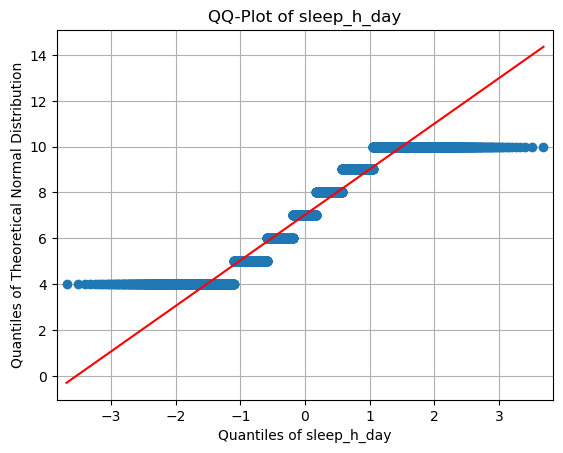

In [59]:
import statsmodels.api as sm

# Choose a numerical feature to analyze (e.g., sleep hours, cholesterol)
feature_name = 'sleep_h_day'

# Extract the data for the chosen feature
data_to_plot = data[feature_name]

# Perform QQ-plot analysis
qqplot = sm.qqplot(data_to_plot, line='s')  # 's' represents the reference line (straight line)
plt.title('QQ-Plot of ' + feature_name)
plt.xlabel('Quantiles of ' + feature_name)
plt.ylabel('Quantiles of Theoretical Normal Distribution')
plt.grid(True)
plt.show()

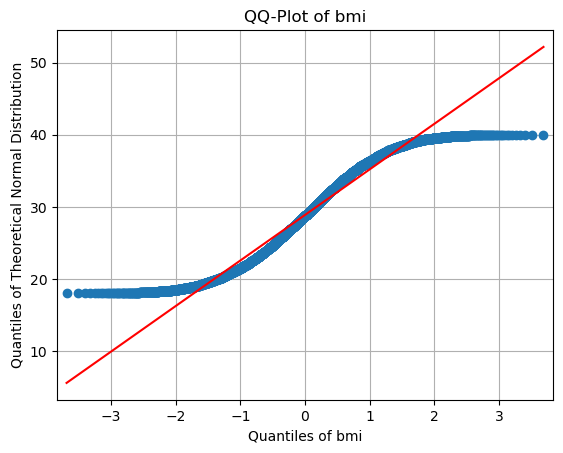

In [60]:

# Choose a numerical feature to analyze (e.g., sleep hours, cholesterol)
feature_name = 'bmi'

# Extract the data for the chosen feature
data_to_plot = data[feature_name]

# Perform QQ-plot analysis
qqplot = sm.qqplot(data_to_plot, line='s')  # 's' represents the reference line (straight line)
plt.title('QQ-Plot of ' + feature_name)
plt.xlabel('Quantiles of ' + feature_name)
plt.ylabel('Quantiles of Theoretical Normal Distribution')
plt.grid(True)
plt.savefig('img/QQ-Plot of bmi.png')
plt.show()

In [61]:
import statsmodels.formula.api as smf

bmi_data = data[['bmi', 'heart_attack_risk']]
bmi_data.dropna(inplace=True)  # Drop missing values if any

# Define the quantile regression model
mod = smf.quantreg('heart_attack_risk ~ bmi',bmi_data)

# Fit the model for the 50th percentile (median)
res = mod.fit(q=0.5)

print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:      heart_attack_risk   Pseudo R-squared:           -6.614e-07
Model:                       QuantReg   Bandwidth:                      0.1135
Method:                 Least Squares   Sparsity:                       0.2359
Date:                Thu, 23 May 2024   No. Observations:                 8763
Time:                        15:30:38   Df Residuals:                     8761
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.315e-07      0.006      0.000      1.000      -0.012       0.012
bmi         1.344e-10      0.000   6.74e-07      1.000      -0.000       0.000


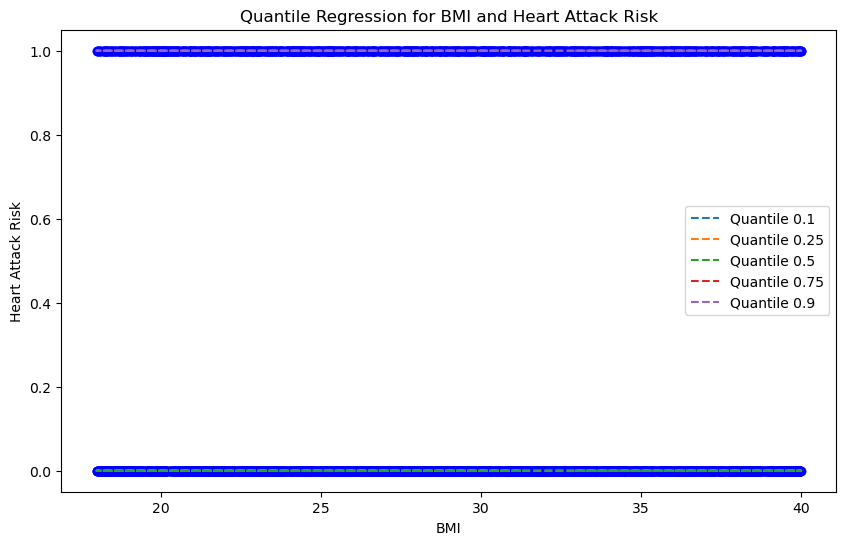

In [62]:


# Define quantiles to compute
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
models = []
for q in quantiles:
    res = mod.fit(q=q)
    models.append((q, res.params['Intercept'], res.params['bmi']))

# Create the plot
plt.figure(figsize=(10, 6))

for q, intercept, slope in models:
    plt.plot(bmi_data['bmi'], intercept + slope * bmi_data['bmi'], linestyle='--', label=f'Quantile {q}')

plt.scatter(bmi_data['bmi'], bmi_data['heart_attack_risk'], alpha=0.5, color='blue')
plt.xlabel('BMI')
plt.ylabel('Heart Attack Risk')
plt.title('Quantile Regression for BMI and Heart Attack Risk')
plt.legend()
plt.show()


In [63]:
import statsmodels.formula.api as smf

cholest_data = data[['cholesterol', 'heart_attack_risk']]
cholest_data.dropna(inplace=True)  # Drop missing values if any

# Define the quantile regression model
mod = smf.quantreg('heart_attack_risk ~ cholesterol', cholest_data)

# Fit the model for the 50th percentile (median)
res = mod.fit(q=0.5)

print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:      heart_attack_risk   Pseudo R-squared:           -9.572e-07
Model:                       QuantReg   Bandwidth:                      0.1135
Method:                 Least Squares   Sparsity:                       0.2359
Date:                Thu, 23 May 2024   No. Observations:                 8763
Time:                        15:30:48   Df Residuals:                     8761
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -5.9e-07      0.004     -0.000      1.000      -0.008       0.008
cholesterol  7.067e-09   1.56e-05      0.000      1.000   -3.05e-05    3.06e-05


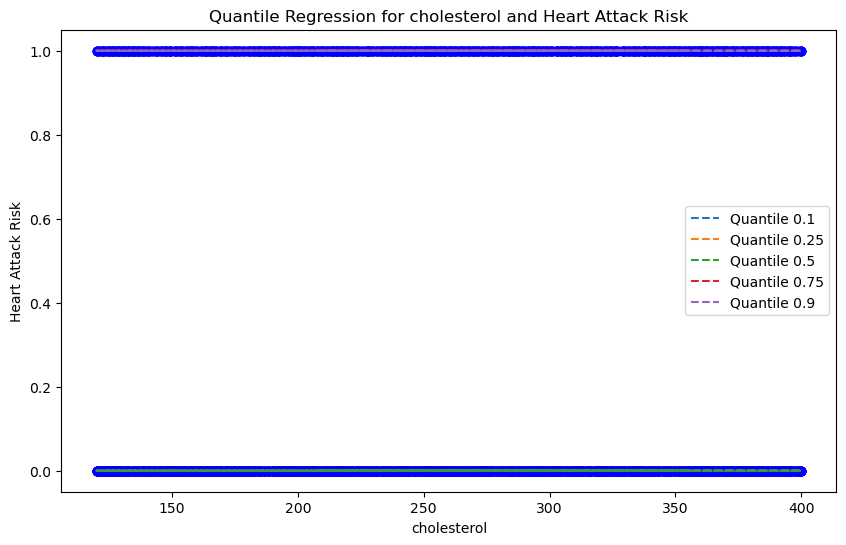

In [64]:

# Define quantiles to compute
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
models = []
for q in quantiles:
    res = mod.fit(q=q)
    models.append((q, res.params['Intercept'], res.params['cholesterol']))

# Create the plot
plt.figure(figsize=(10, 6))

for q, intercept, slope in models:
    plt.plot(cholest_data['cholesterol'], intercept + slope * cholest_data['cholesterol'], linestyle='--', label=f'Quantile {q}')

plt.scatter(cholest_data['cholesterol'], cholest_data['heart_attack_risk'], alpha=0.5, color='blue')
plt.xlabel('cholesterol')
plt.ylabel('Heart Attack Risk')
plt.title('Quantile Regression for cholesterol and Heart Attack Risk')
plt.legend()
plt.show()


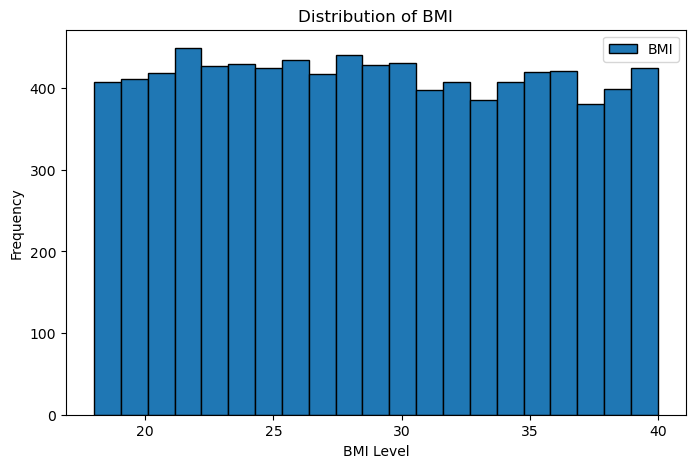

In [66]:
# Create the histogram
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure with one subplot

ax.hist(data['bmi'], bins='auto', edgecolor='black', label='BMI')
ax.set_xlabel('BMI Level')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of BMI')
ax.legend()

# Display the histogram
plt.savefig('img/Distribution of bmi.png')
plt.show()

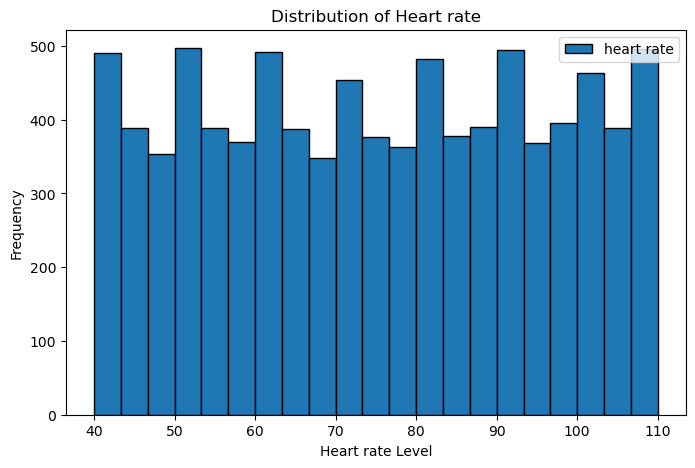

In [67]:
# Create the histogram
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure with one subplot

ax.hist(data['heart_rate'], bins='auto', edgecolor='black', label='heart rate')
ax.set_xlabel('Heart rate Level')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Heart rate')
ax.legend()

# Display the histogram
plt.savefig('img/Distribution of Heart Rate')
plt.show()

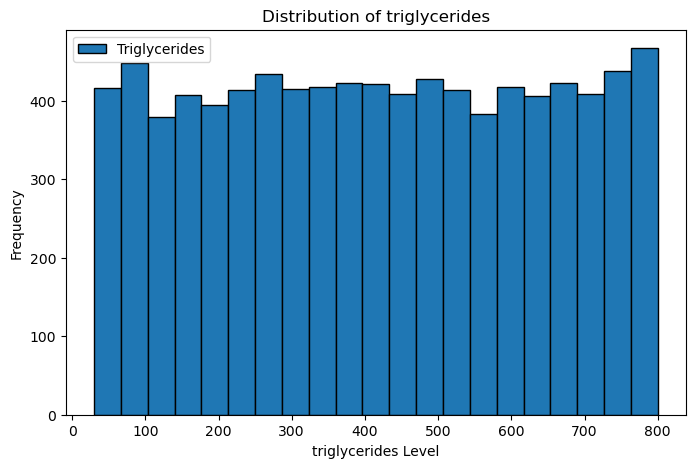

In [68]:
# Create the histogram
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure with one subplot

ax.hist(data['triglycerides'], bins='auto', edgecolor='black', label='Triglycerides')
ax.set_xlabel('triglycerides Level')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of triglycerides')
ax.legend()

# Display the histogram
plt.savefig('img/Distribution of Triglycerides')
plt.show()

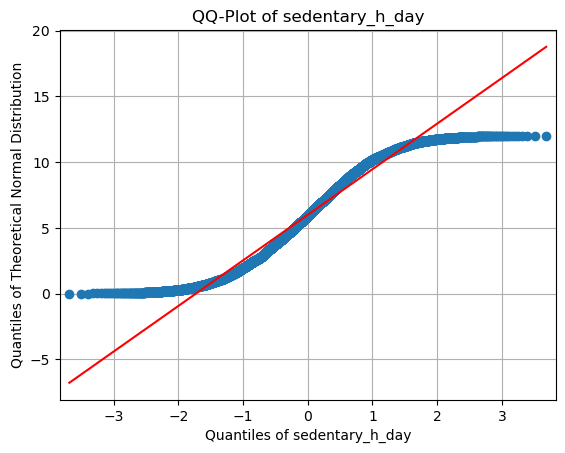

In [69]:

# Choose a numerical feature to analyze (e.g., sleep hours, cholesterol)
feature_name = 'sedentary_h_day'

# Extract the data for the chosen feature
data_to_plot = data[feature_name]

# Perform QQ-plot analysis
qqplot = sm.qqplot(data_to_plot, line='s')  # 's' represents the reference line (straight line)
plt.title('QQ-Plot of ' + feature_name)
plt.xlabel('Quantiles of ' + feature_name)
plt.ylabel('Quantiles of Theoretical Normal Distribution')
plt.grid(True)
plt.savefig('img/QQ-Plot of sedentary hours per day.png')
plt.show()

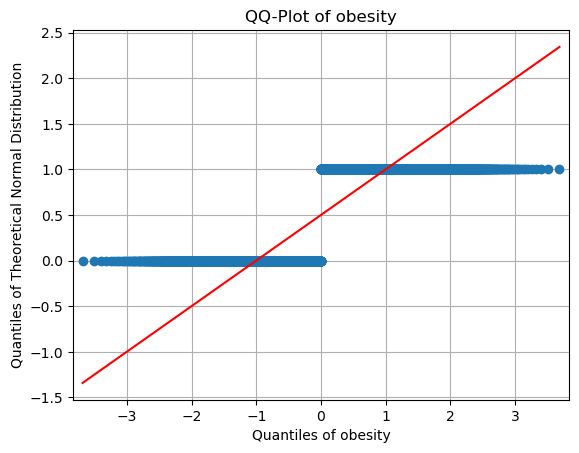

In [70]:

# Choose a numerical feature to analyze (e.g., sleep hours, cholesterol)
feature_name = 'obesity'

# Extract the data for the chosen feature
data_to_plot = data[feature_name]

# Perform QQ-plot analysis
qqplot = sm.qqplot(data_to_plot, line='s')  # 's' represents the reference line (straight line)
plt.title('QQ-Plot of ' + feature_name)
plt.xlabel('Quantiles of ' + feature_name)
plt.ylabel('Quantiles of Theoretical Normal Distribution')
plt.grid(True)
plt.savefig('img/QQ-Plot of Obesity.png')
plt.show()

In [71]:
data.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'excersise_h_week', 'diet', 'previous_heart_problems', 'medication_use',
       'stress_level', 'sedentary_h_day', 'income', 'bmi', 'triglycerides',
       'active_d_week', 'sleep_h_day', 'country', 'continent', 'hemisphere',
       'heart_attack_risk', 'systolic_pressure', 'diastolic_pressure',
       'age_group', 'sex_male', 'diet_healthy', 'diet_unhealthy',
       'z_score_trigly', 'z_score_hr', 'z_score_chol'],
      dtype='object')

In [ ]:
data.drop(['patient_id', 'sex', 'diet','country', 'continent', 'hemisphere', 'z_score_chol', 'z_score_hr', 'z_score_trigly', 'age_group' ], axis=1, inplace=True)

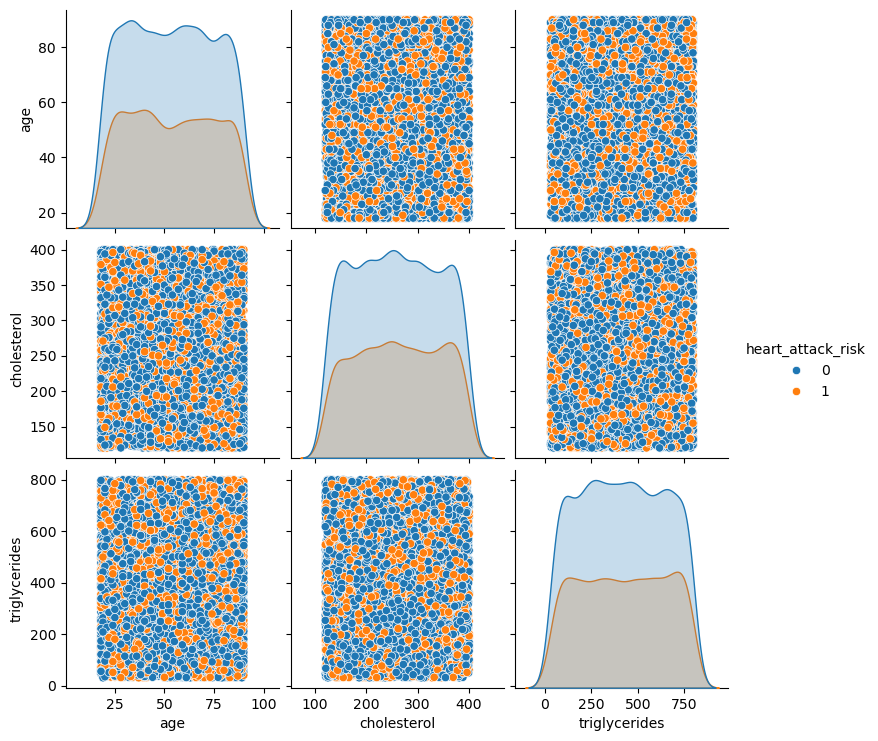

In [75]:
# distribution of numerical features
sns.pairplot(data, hue='heart_attack_risk', vars=['age', 'cholesterol', 'triglycerides'])

<Axes: xlabel='heart_rate', ylabel='bmi'>

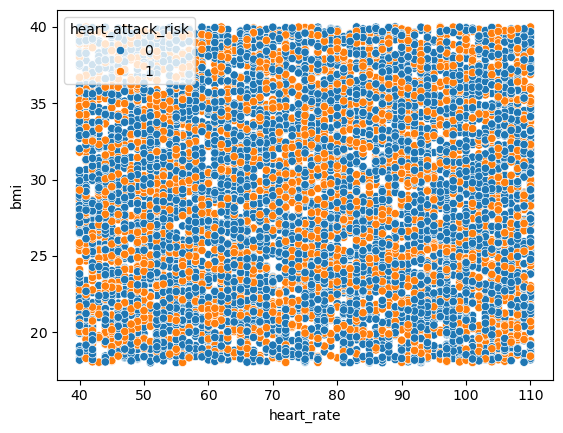

In [76]:
sns.scatterplot(x='heart_rate', y='bmi', hue='heart_attack_risk', data=data)

<Axes: xlabel='diastolic_pressure', ylabel='cholesterol'>

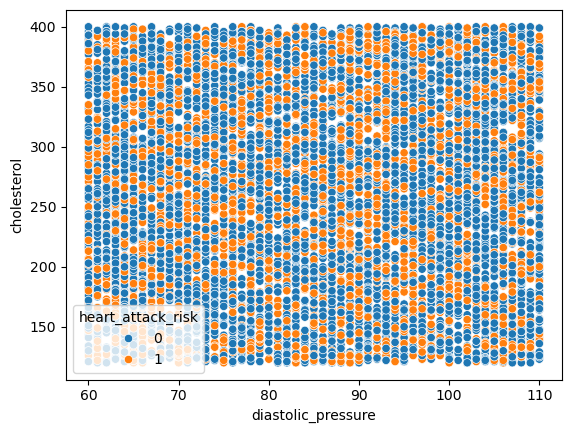

In [77]:
sns.scatterplot(x='diastolic_pressure', y='cholesterol', hue='heart_attack_risk', data=data)

In [78]:
# filtering numeric features as age, resting bp, cholesterol, max heart rate, etc..
numeric_features = ['age', 'cholesterol','systolic_pressure', 'diastolic_pressure', 'heart_rate',  
                   'excersise_h_week', 'stress_level', 'sedentary_h_day', 'income', 'bmi', 'triglycerides', 
                   'active_d_week', 'sleep_h_day', ]

df_numeric = data[numeric_features]

df_numeric.describe()

,age,cholesterol,systolic_pressure,diastolic_pressure,heart_rate,excersise_h_week,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,135.075659,85.156111,75.021682,10.014284,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508
std,21.249509,80.863276,26.349976,14.676565,20.550948,5.783745,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473
min,18.000000,120.000000,90.000000,60.000000,40.000000,0.002442,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000
25%,35.000000,192.000000,112.000000,72.000000,57.000000,4.981579,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000
50%,54.000000,259.000000,135.000000,85.000000,75.000000,10.069559,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000
75%,72.000000,330.000000,158.000000,98.000000,93.000000,15.050018,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000
max,90.000000,400.000000,180.000000,110.000000,110.000000,19.998709,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000


In [80]:
# calculating z-score of numeric columns in the data
z = np.abs(stats.zscore(df_numeric))
z

,age,cholesterol,systolic_pressure,diastolic_pressure,heart_rate,excersise_h_week,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day
0,0.625557,0.641579,0.870044,0.193782,0.147042,1.010838,1.234604,0.179251,1.280130,0.373454,0.588539,1.528843,0.514750
1,1.539322,1.596895,1.135714,0.534480,1.118179,1.418027,1.563129,0.297225,1.582523,0.268479,0.816487,1.090738,0.011823
2,1.539322,0.793023,1.477290,0.943319,0.147042,1.372188,1.234604,1.001031,0.955917,0.113134,0.756800,0.223577,1.520604
3,1.425621,1.522691,1.059809,1.011458,0.098380,0.032188,1.234604,0.477557,0.404902,1.198524,0.177339,0.214528,1.520604
4,0.578495,0.718820,1.672797,0.193782,0.874867,0.727941,0.185454,1.292170,0.028445,1.120826,0.834365,1.090738,1.017677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,1.717530,1.558939,0.623895,0.682328,0.362578,0.884887,1.388476,0.957630,1.461594,1.567374,1.537893,0.011823
8759,1.209884,1.729898,0.832092,1.147738,0.098380,1.131536,0.884887,0.623356,0.739945,0.775078,0.890887,0.223577,0.994032
8760,0.315695,0.122154,0.983903,0.692035,1.458815,1.187161,0.164263,1.043943,1.505080,1.030999,0.488626,0.223577,1.520604
8761,0.833383,1.012597,0.610117,1.237152,0.730990,1.076238,0.164263,1.720804,0.641423,0.252804,1.357305,0.652633,0.491104


In [81]:
threshold = 3
print(np.where(z > threshold))

(array([], dtype=int64), array([], dtype=int64))


In [94]:
# filtering outliers, retaining only those data points which below thresold
data = data[(z < threshold).all(axis=1)]

In [95]:
data.shape

(8763, 24)

In [96]:
data.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_h_day', 'income', 'bmi', 'triglycerides', 'active_d_week',
       'sleep_h_day', 'heart_attack_risk', 'systolic_pressure',
       'diastolic_pressure', 'sex_male', 'diet_healthy', 'diet_unhealthy'],
      dtype='object')

In [97]:
# separating data into x and y
X = data.drop(['heart_attack_risk'], axis=1)
Y = data['heart_attack_risk']

In [98]:
X.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,excersise_h_week,previous_heart_problems,medication_use,stress_level,sedentary_h_day,income,bmi,triglycerides,active_d_week,sleep_h_day,systolic_pressure,diastolic_pressure,sex_male,diet_healthy,diet_unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,158,88,1.0,0.0,0.0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,165,93,1.0,0.0,1.0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,174,99,0.0,1.0,0.0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,163,100,1.0,0.0,0.0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,91,88,1.0,0.0,1.0


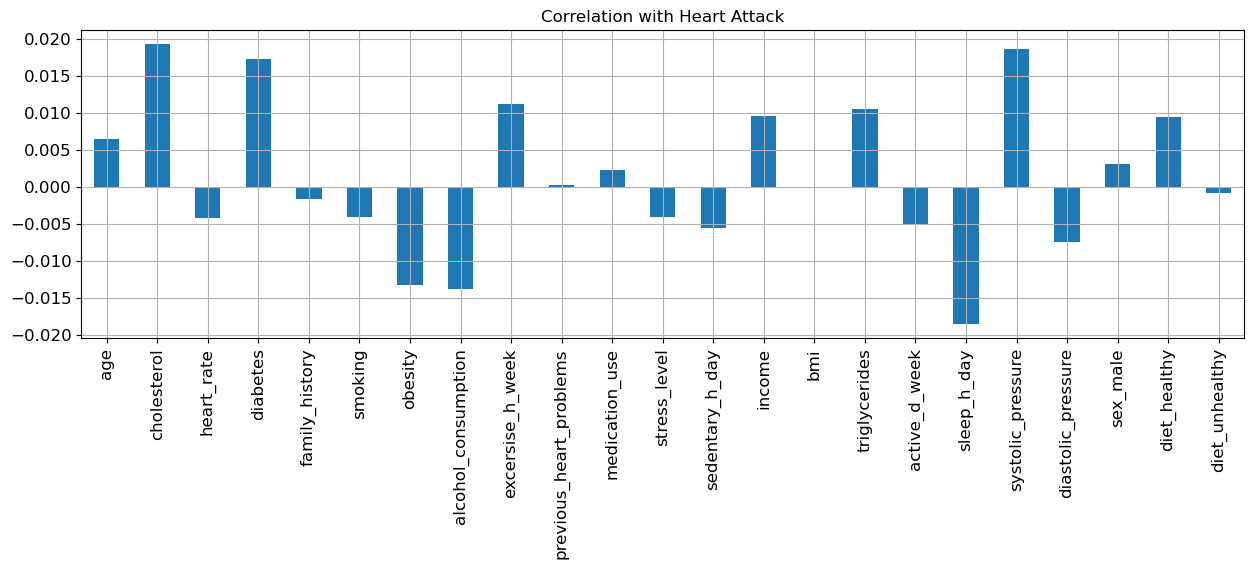

In [99]:
# check correlation with response variable class
X.corrwith(Y).plot.bar(figsize=(15,4), title='Correlation with Heart Attack', fontsize=12, rot=90, grid=True)
plt.savefig('img/correlation with Heart Attack.png')
plt.show()

### Check balance

In [100]:
# check if the data is balanced or not
diabetes_counts = data['diabetes'].value_counts()
print(diabetes_counts)

diabetes
1    5716
0    3047
Name: count, dtype: int64


In [101]:
# check if the data is balanced or not
family_history_counts = data['family_history'].value_counts()
print(family_history_counts)

family_history
0    4443
1    4320
Name: count, dtype: int64


In [102]:
# check if the data is balanced or not
smoking_counts = data['smoking'].value_counts()
print(smoking_counts)

smoking
1    7859
0     904
Name: count, dtype: int64


In [103]:
# check if the data is balanced or not
obesity_counts = data['obesity'].value_counts()
print(obesity_counts)

obesity
1    4394
0    4369
Name: count, dtype: int64


In [104]:
# check if the data is balanced or not
class_counts = data['heart_attack_risk'].value_counts()
print(class_counts)

heart_attack_risk
0    5624
1    3139
Name: count, dtype: int64


In [105]:
X.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_h_day', 'income', 'bmi', 'triglycerides', 'active_d_week',
       'sleep_h_day', 'systolic_pressure', 'diastolic_pressure', 'sex_male',
       'diet_healthy', 'diet_unhealthy'],
      dtype='object')

## Imbalance handling
   **Synthetic Minority Over-Sampling Technique**

In [106]:
# Define and fit the SMOTE oversampler
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, Y)


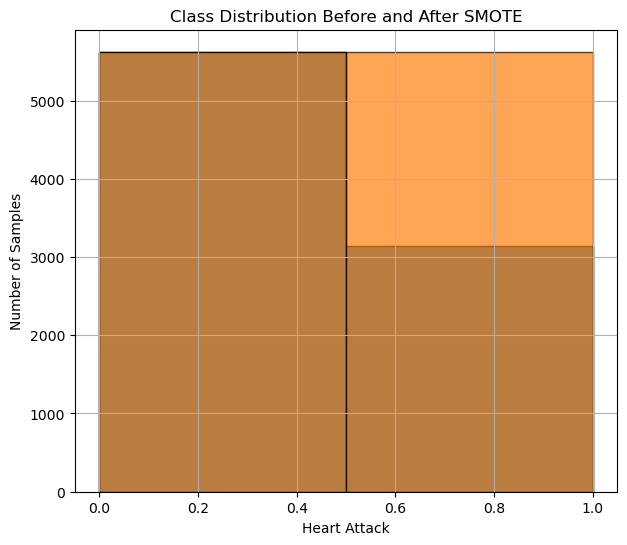

In [107]:
# check data distribution before and after resampling with SMOTE

# Create histograms for original data
plt.figure(figsize=(7, 6))
plt.hist(Y, bins=2, edgecolor='black', label='Original Data')

# Create histograms for SMOTE-resampled data
plt.hist(y_resampled, bins=2, edgecolor='black',  alpha=0.7, label='SMOTE-Resampled')
plt.xlabel('Heart Attack')
plt.ylabel('Number of Samples')
plt.title('Class Distribution Before and After SMOTE')
#plt.legend()
plt.grid(True)
plt.savefig('img/Heart Attack Distribution Before and After SMOTE.png')
plt.show()

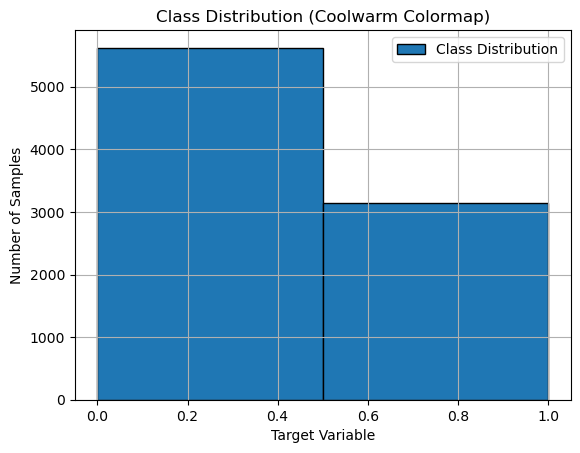

In [108]:
plt.hist(Y, bins=2, edgecolor='black', label='Class Distribution')
plt.xlabel('Target Variable')
plt.ylabel('Number of Samples')
plt.title('Class Distribution (Coolwarm Colormap)')
plt.legend()
plt.grid(True)
plt.show()

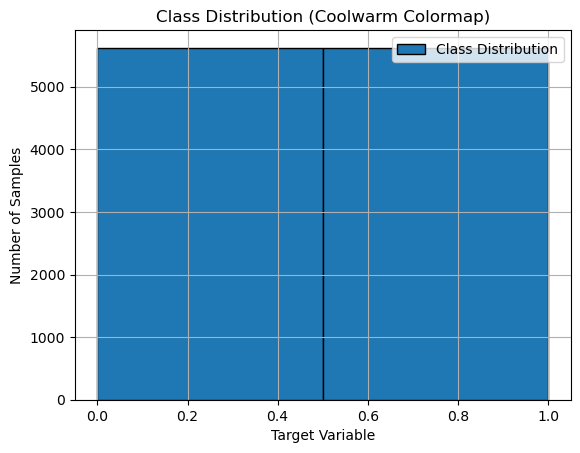

In [109]:
plt.hist(y_resampled, bins=2, edgecolor='black', label='Class Distribution')
plt.xlabel('Target Variable')
plt.ylabel('Number of Samples')
plt.title('Class Distribution (Coolwarm Colormap)')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
from collections import Counter

class_counts_original = Counter(Y)
class_counts_resampled = Counter(y_resampled)

print("Original Data Class Counts:", class_counts_original)
print("SMOTE-Resampled Class Counts:", class_counts_resampled)


Original Data Class Counts: Counter({0: 5624, 1: 3139})
SMOTE-Resampled Class Counts: Counter({0: 5624, 1: 5624})


## Scaling

In [111]:
# train data _ feature scaling

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

    
# Saving Mean and Standard Deviation   
mean = scaler.mean_
std = scaler.scale_

import json

scaler_stats = {'mean': mean.tolist(), 'std': std.tolist()}

with open('scaler_stats.json', 'w') as outfile:
    json.dump(scaler_stats, outfile)


In [112]:
X_scaled_df.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_h_day', 'income', 'bmi', 'triglycerides', 'active_d_week',
       'sleep_h_day', 'systolic_pressure', 'diastolic_pressure', 'sex_male',
       'diet_healthy', 'diet_unhealthy'],
      dtype='object')

## data split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.2, random_state=42)

In [114]:
# check distribution of target variable in train test
print("distribution of target variable in training set")
print(y_train.value_counts())

print("distribution of target variable in test set")
print(y_test.value_counts())

distribution of target variable in training set
heart_attack_risk
0    4504
1    4494
Name: count, dtype: int64
distribution of target variable in test set
heart_attack_risk
1    1130
0    1120
Name: count, dtype: int64


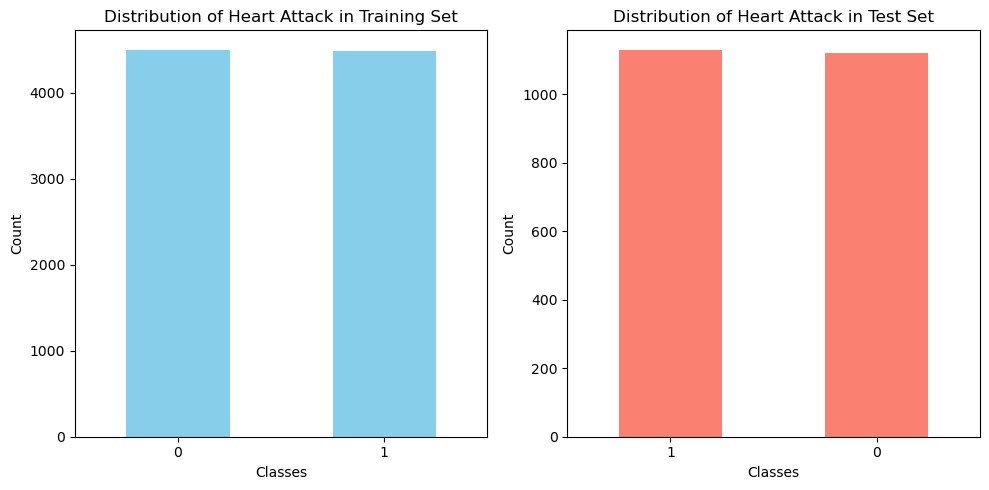

In [115]:

# Plot distribution of target variable in training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Heart Attack in Training Set")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=0) 

# Plot distribution of target variable in test set
plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', color='salmon')
plt.title("Distribution of Heart Attack in Test Set")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=0) 

plt.tight_layout()
plt.savefig('img/Heart Attack distribution after data split.png')
plt.show()

In [116]:
X_test.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_h_day', 'income', 'bmi', 'triglycerides', 'active_d_week',
       'sleep_h_day', 'systolic_pressure', 'diastolic_pressure', 'sex_male',
       'diet_healthy', 'diet_unhealthy'],
      dtype='object')

In [117]:
# build different baseline models and perform 10-fold cross validation to filter top performing baseline models 
# to be used to level of 0 stacked ensembel method

def getBasedModel():
    basedModels = []
    
    basedModels.append(('LR_L2', LogisticRegression(penalty='l2')))
    
    basedModels.append(('LDA', LinearDiscriminantAnalysis()))
    
    basedModels.append(('KNN 5', KNeighborsClassifier(5)))
    basedModels.append(('KNN 7', KNeighborsClassifier(7)))
    basedModels.append(('KNN 9', KNeighborsClassifier(9)))
    basedModels.append(('KNN 11', KNeighborsClassifier(11)))
    
    basedModels.append(('CART', DecisionTreeClassifier()))
    
    basedModels.append(('NB', GaussianNB()))
    
    basedModels.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    basedModels.append(('SVM RBF', SVC(kernel='rbf', gamma='auto', probability=True)))
    basedModels.append(('SVM Sigmoid', SVC(kernel='sigmoid', gamma='auto', probability=True)))
    basedModels.append(('SVM Poly', SVC(kernel='poly', gamma='auto', probability=True)))
    
    basedModels.append(('AdaB', AdaBoostClassifier()))
    
    basedModels.append(('GB', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')))
    
    basedModels.append(('RF_ENT 100', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    basedModels.append(('RF_ENT 500', RandomForestClassifier(criterion='entropy', n_estimators=500)))

    basedModels.append(('RF_Gini 100', RandomForestClassifier(criterion='gini', n_estimators=100)))
    basedModels.append(('RF_Gini 500', RandomForestClassifier(criterion='gini', n_estimators=500)))

    basedModels.append(('EXTRA_TREE 100', ExtraTreesClassifier(n_estimators=100)))
    basedModels.append(('EXTRA_TREE 500', ExtraTreesClassifier(n_estimators=500)))
    basedModels.append(('EXTRA_TREE 1000', ExtraTreesClassifier(n_estimators=1000)))

    basedModels.append(('MLP', MLPClassifier()))
    
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    basedModels.append(('XGB_100', XGBClassifier(n_estimators=100)))
    basedModels.append(('XGB_500', XGBClassifier(n_estimators=500)))
    basedModels.append(('XGB_1000', XGBClassifier(n_estimators=1000)))
    basedModels.append(('XGB_2000', XGBClassifier(n_estimators=2000)))

    return basedModels


In [119]:
# function for perform 10-fold cross validation of all the baseline models
def baseline2(x_train, y_train, models):
    num_folds = 10
    scoring = 'accuracy'
    seed = 5
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    
    return results, msg

In [120]:
models = getBasedModel()
names, results = baseline2(X_train, y_train, models)

LR_L2: 0.606468 (0.015663)
LDA: 0.606468 (0.016299)
KNN 5: 0.616584 (0.011131)
KNN 7: 0.614582 (0.013409)
KNN 9: 0.608026 (0.013122)
KNN 11: 0.608357 (0.012719)
CART: 0.604577 (0.015445)
NB: 0.626582 (0.018370)
SVM Linear: 0.608358 (0.018470)
SVM RBF: 0.653257 (0.014865)
SVM Sigmoid: 0.548567 (0.021509)
SVM Poly: 0.601913 (0.016961)
AdaB: 0.665594 (0.012880)
GB: 0.678820 (0.015874)
RF_ENT 100: 0.693934 (0.012574)
RF_ENT 500: 0.705270 (0.013378)
RF_Gini 100: 0.699381 (0.014011)
RF_Gini 500: 0.704937 (0.013356)
EXTRA_TREE 100: 0.680486 (0.020220)
EXTRA_TREE 500: 0.686265 (0.018771)
EXTRA_TREE 1000: 0.686264 (0.016456)
MLP: 0.631807 (0.014294)
SGD3000: 0.578354 (0.017119)
XGB_100: 0.667927 (0.014243)
XGB_500: 0.663150 (0.013471)
XGB_1000: 0.660149 (0.012784)
XGB_2000: 0.661148 (0.011964)


## Model building

### SVM

In [121]:
# svc kernel=>linear
svc_model = SVC(kernel='rbf', gamma='auto', probability=True)
svc_model.fit(X_train, y_train)
y_proba_svc = svc_model.predict_proba(X_test)
y_pred_svc = svc_model.predict(X_test)

### AdaBoost

In [122]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)


### gradient boosting machine

In [123]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)


### Random Forest (entropy)

In [124]:
rf_ent_model = RandomForestClassifier(criterion='entropy', n_estimators=500)
rf_ent_model.fit(X_train, y_train)
y_proba_rf_ent = rf_ent_model.predict_proba(X_test)
y_pred_rf_ent = rf_ent_model.predict(X_test)

### Random Forest (gini)

In [125]:
rf_gin_model = RandomForestClassifier(criterion='gini', n_estimators=500)
rf_gin_model.fit(X_train, y_train)
y_proba_rf_gin = rf_gin_model.predict_proba(X_test)
y_pred_rf_gin = rf_gin_model.predict(X_test)

### Extra tree 500

In [126]:
et_500_model = ExtraTreesClassifier(n_estimators=500)
et_500_model.fit(X_train, y_train)
y_proba_et_500 = et_500_model.predict_proba(X_test)
y_pred_et_500 = et_500_model.predict(X_test)

### Extra tree 1000

In [127]:
et_1000_model = ExtraTreesClassifier(n_estimators=1000)
et_1000_model.fit(X_train, y_train)
y_proba_et_1000 = et_1000_model.predict_proba(X_test)
y_pred_et_1000 = et_1000_model.predict(X_test)

### XGB 1000

In [128]:
xgb_1000_model = xgb = XGBClassifier(n_estimators=1000)
xgb_1000_model.fit(X_train, y_train)
y_proba_xgb_1000 = xgb_1000_model.predict_proba(X_test)
y_pred_xgb_1000 = xgb_1000_model.predict(X_test)

In [129]:
'''
rf_ent_model = RandomForestClassifier(criterion='entropy', n_estimators=500)
rf_gin_model = RandomForestClassifier(criterion='gini', n_estimators=500)
svc_model = SVC(kernel='rbf', gamma='auto', probability=True)
ada_model = AdaBoostClassifier()
gbm_model = GradientBoostingClassifier()
et_1000_model = ExtraTreesClassifier(n_estimators=1000)
xgb_1000 = xgb = XGBClassifier(n_estimators=1000)
'''


"\nrf_ent_model = RandomForestClassifier(criterion='entropy', n_estimators=500)\nrf_gin_model = RandomForestClassifier(criterion='gini', n_estimators=500)\nsvc_model = SVC(kernel='rbf', gamma='auto', probability=True)\nada_model = AdaBoostClassifier()\ngbm_model = GradientBoostingClassifier()\net_1000_model = ExtraTreesClassifier(n_estimators=1000)\nxgb_1000 = xgb = XGBClassifier(n_estimators=1000)\n"

### Stacking ensemble

In [130]:
# Define the base learners
base_learners = [
    ('rf_gini_500', RandomForestClassifier(n_estimators=500, criterion='gini', random_state=42)),
    ('rf_ent_500', RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=42)),
    ('rf_gini_100', RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)),
    ('rf_ent_100', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)),
    ('GBoost', GradientBoostingClassifier()),
    ('XBG_1000', XGBClassifier(n_estimators=1000)),
    ('et_500', ExtraTreesClassifier(n_estimators=500)),
    ('et_1000', ExtraTreesClassifier(n_estimators=1000))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Stacking Ensemble Accuracy: {accuracy_stacking:.4f}')

# Cross-validation to evaluate the model more robustly
cv_scores_stacking = cross_val_score(stacking_clf, X, Y, cv=5)
print(f'Cross-validated Accuracy: {np.mean(cv_scores_stacking):.4f} (+/- {np.std(cv_scores_stacking):.4f})')


Stacking Ensemble Accuracy: 0.7027
Cross-validated Accuracy: 0.6418 (+/- 0.0002)


In [131]:
# ensemble stacking evaluation

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_stacking))
print(confusion_matrix(y_test, y_pred_stacking))



              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1120
           1       0.80      0.55      0.65      1130

    accuracy                           0.70      2250
   macro avg       0.73      0.70      0.70      2250
weighted avg       0.73      0.70      0.70      2250

[[965 155]
 [514 616]]


,Model,Accuracy,Precision,Recall,Specificity,F1 score,ROC
0,Support Vector,0.665778,0.729369,0.531858,0.800893,0.615148,0.666376


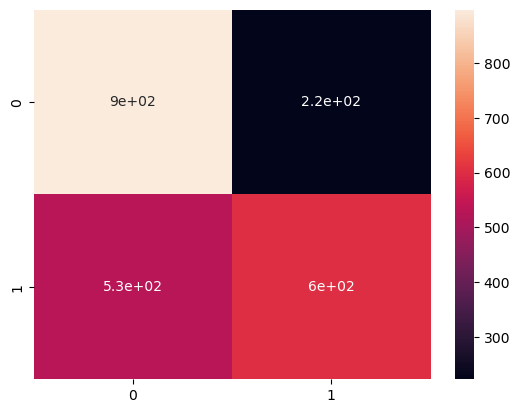

In [154]:
# model evaluation

cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

specifity = TN/(TN+FP)
los_log = log_loss(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
roc = roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

matthew = matthews_corrcoef(y_test, y_pred_svc)

model_results = pd.DataFrame([["Support Vector", acc, prec, rec, specifity, f1, roc, ]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 score', 'ROC', ])

model_results

In [155]:
# comparison with other models
total_model = {
    'Ada': y_pred_ada,
    'GBoost': y_pred_gbm,
    'RF_ENT_500': y_pred_rf_ent,
    'RF_Gini_500': y_pred_rf_gin,
    'Extra_Tree_500': y_pred_et_500,
    'Extra_Tree_1000': y_pred_et_1000,
    'XGB_1000': y_pred_xgb_1000,
    'Stacking': y_pred_stacking,  # Adding the stacking model predictions
    }

# dataframe for all model prediction
models = pd.DataFrame(total_model)

# Initialize a dictionary for results
results_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'F1 score': [],
    'ROC': []
}


In [157]:
for column in models:
    # model evaluation
    cm = confusion_matrix(y_test, models[column])
    #sns.heatmap(cm, annot=True)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    
    specifity = TN/(TN+FP)
    los_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    # Append results to the dictionary
    results_dict['Model'].append(column)
    results_dict['Accuracy'].append(acc)
    results_dict['Precision'].append(prec)
    results_dict['Recall'].append(rec)
    results_dict['Specificity'].append(specifity)
    results_dict['F1 score'].append(f1)
    results_dict['ROC'].append(roc)
    
    
    matthew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, specifity, f1, roc, ]],
        columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 score', 'ROC',])
    model_results = pd.concat([model_results, results], ignore_index=True)
    
model_results

,Model,Accuracy,Precision,Recall,Specificity,F1 score,ROC
0,Support Vector,0.665778,0.729369,0.531858,0.800893,0.615148,0.666376
1,Ada,0.668000,0.742099,0.519469,0.817857,0.611140,0.668663
2,GBoost,0.682222,0.812971,0.476991,0.889286,0.601227,0.683138
3,RF_ENT_500,0.705333,0.836941,0.513274,0.899107,0.636314,0.706191
4,RF_Gini_500,0.713778,0.851156,0.521239,0.908036,0.646542,0.714637
5,Extra_Tree_500,0.694667,0.754891,0.580531,0.809821,0.656328,0.695176
6,Extra_Tree_1000,0.696000,0.761124,0.575221,0.817857,0.655242,0.696539
7,XGB_1000,0.660444,0.689441,0.589381,0.732143,0.635496,0.660762
8,Stacking,0.702667,0.798962,0.545133,0.861607,0.648080,0.703370


In [158]:
# Save the results to a CSV file
model_results.to_csv('model_comparison_results.csv', index=False)


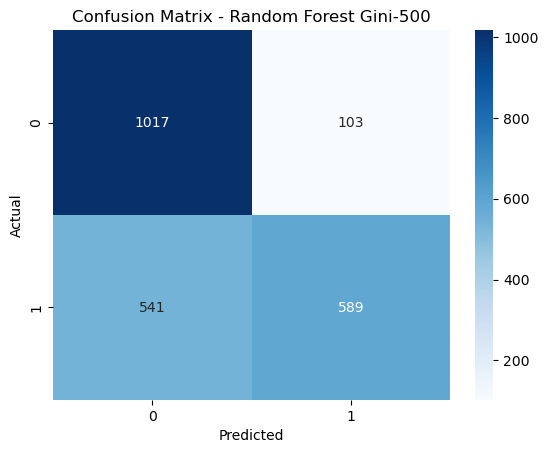

In [159]:
# Confusion Matrix for the best model

conf_matrix = confusion_matrix(y_test, y_pred_rf_gin)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Gini-500')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('img/Confusion Matrix - best model.png')
plt.show()


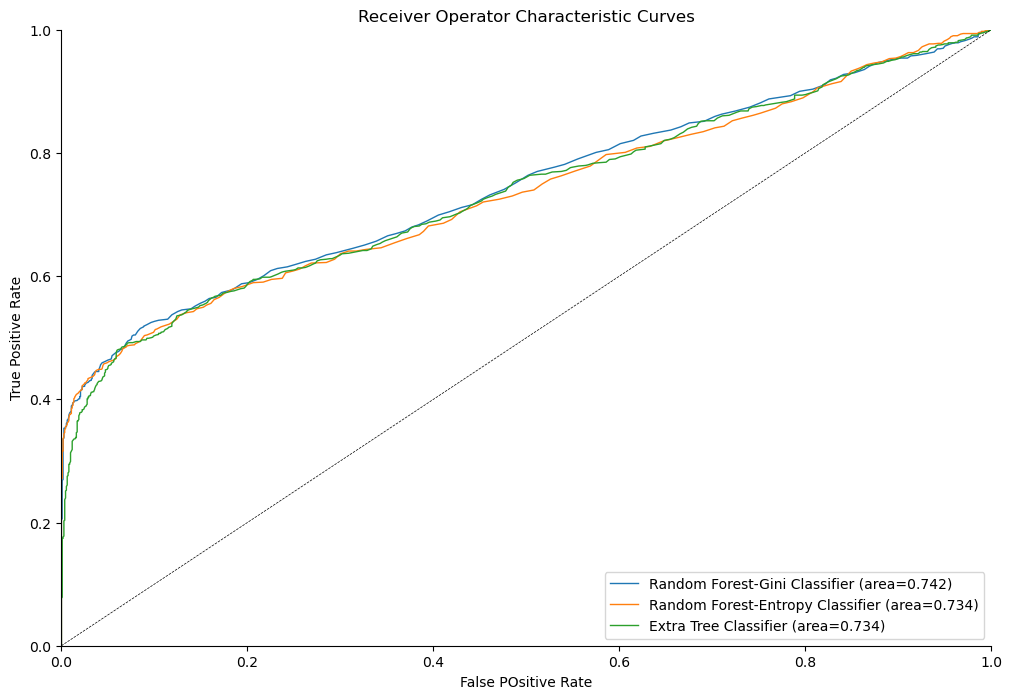

In [160]:
# ROC AUC Curve for best 3 model .., .., ..

def roc_auc_plot(y_true, y_proba, label='', l='-', lw=1.0):
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,label ="%s (area=%.3f)"%(label, roc_auc_score(y_test, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test, y_proba_rf_gin, label='Random Forest-Gini Classifier', l='-')
roc_auc_plot(y_test, y_proba_rf_ent, label='Random Forest-Entropy Classifier', l='-')
roc_auc_plot(y_test, y_proba_et_1000, label='Extra Tree Classifier', l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc='lower right')
ax.set_xlabel('False POsitive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

# Save the plot as an image
plt.savefig('img/roc_auc_curve best-three models.png')
plt.show()

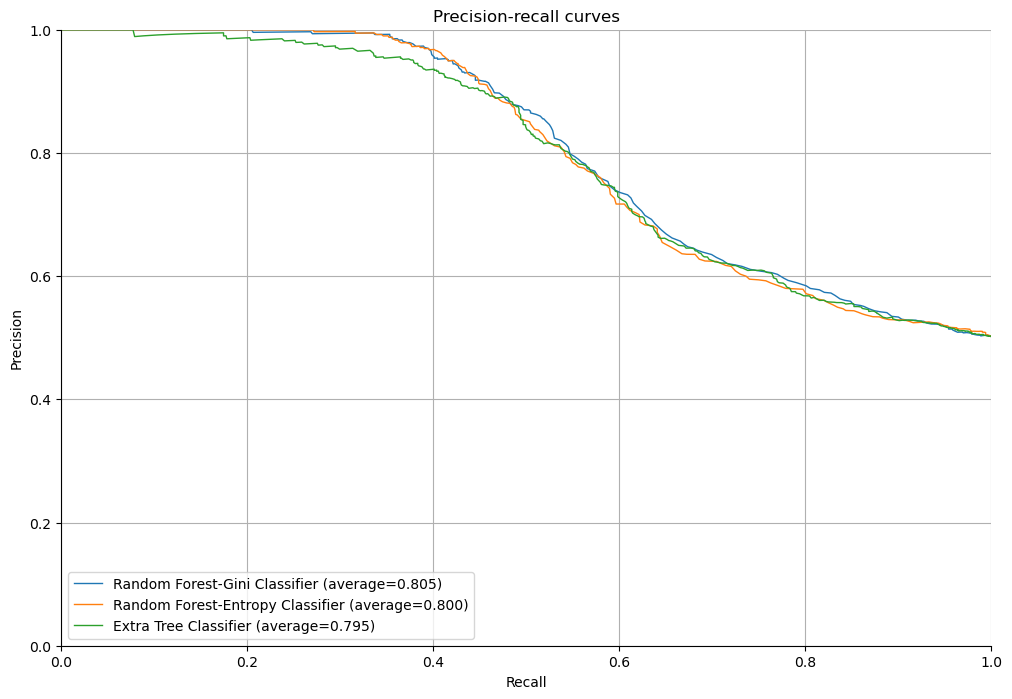

In [161]:
# Precision, recall curves

def precision_recall_plot(y_true, y_proba, label='', l='-', lw=1.0):
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1], average="micro")
    ax.plot(recall, precision, label = '%s (average=%.3f)'%(label, average_precision), linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(12,8))

precision_recall_plot(y_test, y_proba_rf_gin, label='Random Forest-Gini Classifier', l='-')
precision_recall_plot(y_test, y_proba_rf_ent, label='Random Forest-Entropy Classifier', l='-')
precision_recall_plot(y_test, y_proba_et_1000, label='Extra Tree Classifier', l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='lower left')
ax.grid(True)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Precision-recall curves')
sns.despine()

# Save the plot as an image
plt.savefig('img/precision_recall_curve best-three models.png')
plt.show()

### Saving the Model

In [162]:
# saving intial model with all features
joblib.dump(rf_gin_model, 'heart_attack_RFGin500_model.pkl')

['heart_attack_RFGin500_model.pkl']

### Feature reduction (15)
    - SelectKBest,
    - Recursive Feature Elimination,
    - Extra Trees Classifier Feature Importance

In [163]:
X_train.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'excersise_h_week',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_h_day', 'income', 'bmi', 'triglycerides', 'active_d_week',
       'sleep_h_day', 'systolic_pressure', 'diastolic_pressure', 'sex_male',
       'diet_healthy', 'diet_unhealthy'],
      dtype='object')

In [ ]:
num_features = 10

In [ ]:
x_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_features)
chi_selector.fit(x_norm, Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns.tolist()
print(str(len(chi_feature)), "selected features")

In [ ]:
# RFE (Recursive Feature Elimination)

rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=num_features, step=10, verbose=5)
rfe_selector.fit(x_norm, Y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
selected_features_model = X.columns[rfe_selector.get_support()]
#selected_features_model = x.columns[rfe_feature]
print(str(len(rfe_feature)), "selected features")

In [ ]:
# Feature selection using Extra Trees Classifier Feature Importance

model_et = ExtraTreesClassifier(n_estimators=1000)
model_et.fit(X, Y)
feature_importances = model_et.feature_importances_
feature_importances = feature_importances / feature_importances.max()
selected_features = X.columns[feature_importances >= feature_importances.mean()]
print(f"{len(selected_features)} selected features:", selected_features.tolist())

In [ ]:
# Feature selection using SelectFromModel with Extra Trees Classifier

selector = SelectFromModel(model_et, threshold=feature_importances.mean())
selector.fit(X, Y)
selected_features_model = X.columns[selector.get_support()]
print(f"{len(selected_features_model)} selected features:", selected_features_model.tolist())

In [ ]:
x_selected = X[selected_features]
x_selected.head()

In [ ]:
scaler = StandardScaler()

x_selected_scaled = scaler.fit_transform(x_selected)
new_x = pd.DataFrame(x_selected_scaled, columns=x_selected.columns)

new_x

In [ ]:
new_x.isna().sum()

In [ ]:
new_x.dtypes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_x, Y, test_size=0.3, shuffle=True)

In [ ]:
# Random Forest-Gini-500
rf_gin = RandomForestClassifier(criterion='gini', n_estimators=500)
rf_gin.fit(X_train, y_train)
y_proba_rf_gin = rf_gin.predict_proba(X_test)
y_pred_rf_gin = rf_gin.predict(X_test)

In [ ]:
# model evaluation

cm = confusion_matrix(y_test, y_pred_rf_gin)
sns.heatmap(cm, annot=True)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

specifity = TN/(TN+FP)
los_log = log_loss(y_test, y_pred_rf_gin)
acc = accuracy_score(y_test, y_pred_rf_gin)
roc = roc_auc_score(y_test, y_pred_rf_gin)
prec = precision_score(y_test, y_pred_rf_gin)
rec = recall_score(y_test, y_pred_rf_gin)
f1 = f1_score(y_test, y_pred_rf_gin)

matthew = matthews_corrcoef(y_test, y_pred_rf_gin)

model_results = pd.DataFrame([["Random Forest-Gini-500", acc, prec, rec, specifity, f1, roc, los_log, matthew]],
    columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 score', 'ROC', 'Log_Loss', 'Matthew_correcoef'])

model_results

## Model deployment

In [ ]:
# Load the trained model from the file
model = joblib.load('heart_disease_prediction_RF_Gin_500_model.pkl')
print(model)

In [ ]:
new_data = {
       'age': 23,
        'cholesterol': 35,
        'heart_rate': 78,
        'diabetes': 0,
        'family_history': 0,
        'smoking': 0,
        'obesity': 0,
        'alcohol_consumption': 0,
        'excersise_h_week': 0,
        'previous_heart_problems': 0,
        'medication_use': 0,
        'stress_level': 1,
        'sedentary_h_day': 1,
        'income': 5600,
        'bmi': 22,
        'triglycerides': 102,
        'active_d_week': 6,
        'sleep_h_day': 8,
        'systolic_pressure': 84,
        'diastolic_pressure': 64,
        'sex': 'female',
        'diet': 'healthy',
    
}


# convert into a DataFrame
new_data_df = pd.DataFrame(new_data, index=[0])
new_data_df

In [ ]:
# encoding

# Create a new column 'sex_male' indicating male as 1.0 and female as 0.0
new_data_df['sex_male'] = new_data_df['sex'].apply(lambda x: 1.0 if x == 'male' else 0.0)

new_data_df['diet_healthy'] = new_data_df['diet'].apply(lambda x: 1.0 if x == 'healthy' else 0.0)

new_data_df['diet_unhealthy'] = new_data_df['diet'].apply(lambda x: 1.0 if x == 'unhealthy' else 0.0)

new_data_df.drop(['diet', 'sex'], axis=1, inplace=True)

new_data_df

In [ ]:
new_data_df.columns

In [ ]:
# Load the scaler from the file
scaler = joblib.load('scaler.pkl')
print("Scaler loaded successfully:", scaler)

# Load the saved scaling statistics from the JSON file
with open('scaler_stats.json', 'r') as infile:
    scaler_stats = json.load(infile)

mean = np.array(scaler_stats['mean'])
std = np.array(scaler_stats['std'])

#print("Scaler mean:", mean)
#print("Scaler std:", std)


In [ ]:
# Reshape the data (if necessary)
new_data_array = new_data_df.to_numpy().reshape(1, -1)

# Scale the data
scaled_data = scaler.transform((new_data_array - mean) / std)

print("Scaled data:\n", scaled_data)

prediction_result = model.predict(scaled_data)
print(prediction_result)

In [ ]:

# Choose a classification threshold (adjust based on your needs)
threshold = 0.5  # Common choice, you might need to adjust this

# Classify the data point based on the threshold
if prediction_result[0] >= threshold:
    predicted_class = "1 => In a risk of heart attack"  # Replace with your class label
else:
    predicted_class = "0 => Not in a risk of heart attack"  # Replace with your class label

print("Predicted class:", predicted_class)